# Common Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import (StandardScaler, MinMaxScaler, 
                                  RobustScaler, MaxAbsScaler, PolynomialFeatures)
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ARDRegression
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn.model_selection import GroupKFold, cross_val_score

# Normalization

In [2]:
# Load the data
df = pd.read_csv('TPA DPU2023.csv')

# Select only the columns we want to keep
selected_cols = ['MMF', 'TG', 'CLG', 'Gel Strenght(N*m)']
df_selected = df[selected_cols].copy()

# Normalize only the Gel Strength column to 0.1-1 range
scaler = MinMaxScaler(feature_range=(0.1, 1))
df_selected['Gel Strenght(N*m)'] = scaler.fit_transform(df_selected[['Gel Strenght(N*m)']])

# Save the new file
output_file = 'TPA_DPU2023_normalized_Gel_Strength.csv'
df_selected.to_csv(output_file, index=False)

# Linear Regression

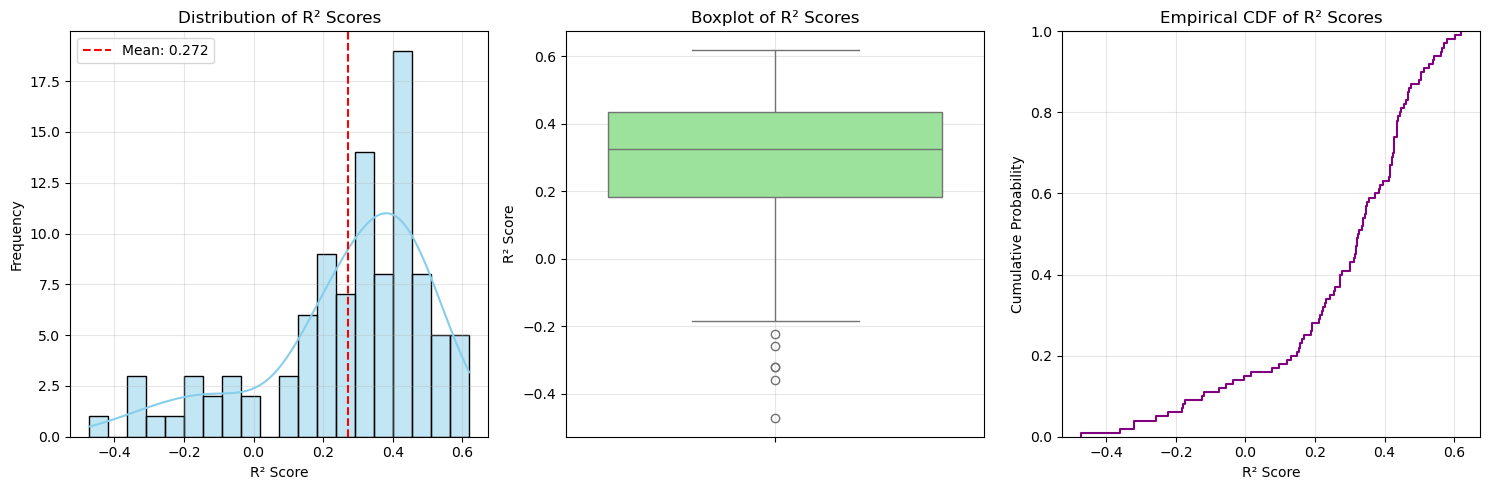


R² Score Statistics:
Mean: 0.2718
Median: 0.3254
Standard Deviation: 0.2361
Minimum: -0.4725
Maximum: 0.6198
5th Percentile: -0.2249
95th Percentile: 0.5628

Coefficient Stability (Mean ± Std Dev):
MMF: 0.0307 ± 0.0160
TG: 0.1394 ± 0.0166
CLG: -0.0034 ± 0.0162

Best performance (R² = 0.6198) at random_state = 64
Worst performance (R² = -0.4725) at random_state = 80


In [4]:
# Load your data
df = pd.read_csv('TPA_DPU2023_normalized_Gel_Strength.csv')

# Configuration
N_TRIALS = 100  # Number of random states to test
TEST_SIZE = 0.3  # Validation set size

# Store results
r2_scores = []
coefficients = []

for state in range(N_TRIALS):
    # Split data
    X = df.iloc[:, 0:3].values  # Features (columns 1-3)
    y = df.iloc[:, 3].values     # Target (column 4)
    
    X_train, X_valid, y_train, y_valid = train_test_split(
        X, y, test_size=TEST_SIZE, random_state=state)
    
    # Standardize
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_valid = scaler.transform(X_valid)
    
    # Train and evaluate
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    r2 = r2_score(y_valid, y_pred)
    
    r2_scores.append(r2)
    coefficients.append(model.coef_)

# Convert to numpy arrays
r2_scores = np.array(r2_scores)
coefficients = np.array(coefficients)

# Create figure with multiple subplots
plt.figure(figsize=(15, 5))

# 1. Histogram of R² scores
plt.subplot(1, 3, 1)
sns.histplot(r2_scores, bins=20, kde=True, color='skyblue')
plt.axvline(np.mean(r2_scores), color='red', linestyle='--', 
            label=f'Mean: {np.mean(r2_scores):.3f}')
plt.xlabel('R² Score')
plt.ylabel('Frequency')
plt.title('Distribution of R² Scores')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Boxplot of R² scores
plt.subplot(1, 3, 2)
sns.boxplot(y=r2_scores, color='lightgreen')
plt.ylabel('R² Score')
plt.title('Boxplot of R² Scores')
plt.grid(True, alpha=0.3)

# 3. ECDF Plot
plt.subplot(1, 3, 3)
sns.ecdfplot(r2_scores, color='purple')
plt.xlabel('R² Score')
plt.ylabel('Cumulative Probability')
plt.title('Empirical CDF of R² Scores')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistical summary
print("\nR² Score Statistics:")
print(f"Mean: {np.mean(r2_scores):.4f}")
print(f"Median: {np.median(r2_scores):.4f}")
print(f"Standard Deviation: {np.std(r2_scores):.4f}")
print(f"Minimum: {np.min(r2_scores):.4f}")
print(f"Maximum: {np.max(r2_scores):.4f}")
print(f"5th Percentile: {np.percentile(r2_scores, 5):.4f}")
print(f"95th Percentile: {np.percentile(r2_scores, 95):.4f}")

# Coefficient stability analysis
print("\nCoefficient Stability (Mean ± Std Dev):")
for i, col in enumerate(['MMF', 'TG', 'CLG']):
    print(f"{col}: {np.mean(coefficients[:, i]):.4f} ± {np.std(coefficients[:, i]):.4f}")

# Best/worst cases
best_idx = np.argmax(r2_scores)
worst_idx = np.argmin(r2_scores)
print(f"\nBest performance (R² = {r2_scores[best_idx]:.4f}) at random_state = {best_idx}")
print(f"Worst performance (R² = {r2_scores[worst_idx]:.4f}) at random_state = {worst_idx}")

# Polynomial degree=2

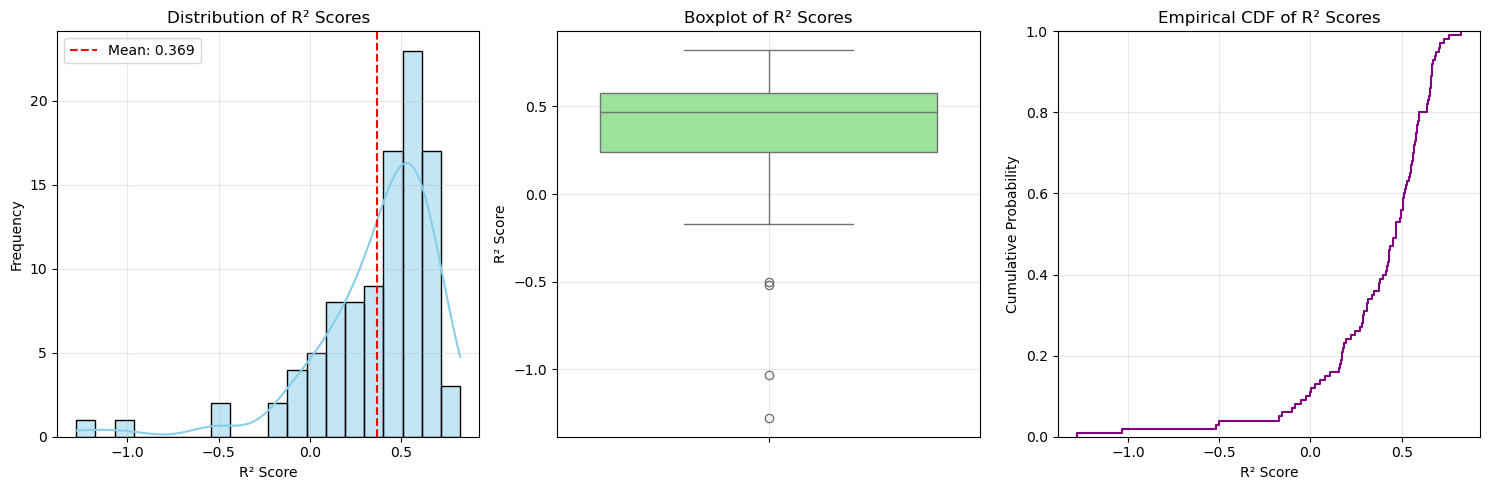


R² Score Statistics:
Mean: 0.3694
Median: 0.4681
Standard Deviation: 0.3401
Minimum: -1.2804
Maximum: 0.8239
5th Percentile: -0.1570
95th Percentile: 0.6891

Coefficient Stability (Mean ± Std Dev):
MMF: 0.0266 ± 0.0137
TG: 0.1561 ± 0.0209
CLG: -0.0028 ± 0.0166
MMF^2: 0.0189 ± 0.0157
MMF TG: 0.0269 ± 0.0132
MMF CLG: 0.0318 ± 0.0170
TG^2: -0.0821 ± 0.0165
TG CLG: 0.0174 ± 0.0153
CLG^2: 0.0477 ± 0.0142

Best performance (R² = 0.8239) at random_state = 58
Worst performance (R² = -1.2804) at random_state = 81


In [5]:
# Load your data
df = pd.read_csv('TPA_DPU2023_normalized_Gel_Strength.csv')

# Configuration
N_TRIALS = 100  # Number of random states to test
TEST_SIZE = 0.3  # Validation set size
DEGREE = 2     # Polynomial degree

# Store results
r2_scores = []
coefficients = []

for state in range(N_TRIALS):
    # Split data
    X = df.iloc[:, 0:3].values  # Features (columns 1-3)
    y = df.iloc[:, 3].values     # Target (column 4)
    
    X_train, X_valid, y_train, y_valid = train_test_split(
        X, y, test_size=TEST_SIZE, random_state=state)
    
    # Create pipeline with polynomial features and linear regression
    model = make_pipeline(
        StandardScaler(),
        PolynomialFeatures(degree=DEGREE, include_bias=False),
        LinearRegression()
    )
    
    # Train and evaluate
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    r2 = r2_score(y_valid, y_pred)
    
    r2_scores.append(r2)
    
    # Get coefficients (excluding the polynomial features step)
    lin_reg = model.named_steps['linearregression']
    poly = model.named_steps['polynomialfeatures']
    coefficients.append(lin_reg.coef_)

# Convert to numpy arrays
r2_scores = np.array(r2_scores)
coefficients = np.array(coefficients)

# Create figure with multiple subplots
plt.figure(figsize=(15, 5))

# 1. Histogram of R² scores
plt.subplot(1, 3, 1)
sns.histplot(r2_scores, bins=20, kde=True, color='skyblue')
plt.axvline(np.mean(r2_scores), color='red', linestyle='--', 
            label=f'Mean: {np.mean(r2_scores):.3f}')
plt.xlabel('R² Score')
plt.ylabel('Frequency')
plt.title('Distribution of R² Scores')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Boxplot of R² scores
plt.subplot(1, 3, 2)
sns.boxplot(y=r2_scores, color='lightgreen')
plt.ylabel('R² Score')
plt.title('Boxplot of R² Scores')
plt.grid(True, alpha=0.3)

# 3. ECDF Plot
plt.subplot(1, 3, 3)
sns.ecdfplot(r2_scores, color='purple')
plt.xlabel('R² Score')
plt.ylabel('Cumulative Probability')
plt.title('Empirical CDF of R² Scores')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistical summary
print("\nR² Score Statistics:")
print(f"Mean: {np.mean(r2_scores):.4f}")
print(f"Median: {np.median(r2_scores):.4f}")
print(f"Standard Deviation: {np.std(r2_scores):.4f}")
print(f"Minimum: {np.min(r2_scores):.4f}")
print(f"Maximum: {np.max(r2_scores):.4f}")
print(f"5th Percentile: {np.percentile(r2_scores, 5):.4f}")
print(f"95th Percentile: {np.percentile(r2_scores, 95):.4f}")

# Coefficient stability analysis
# Get feature names for polynomial features
poly_feature_names = model.named_steps['polynomialfeatures'].get_feature_names_out(['MMF', 'TG', 'CLG'])
print("\nCoefficient Stability (Mean ± Std Dev):")
for i, name in enumerate(poly_feature_names):
    print(f"{name}: {np.mean(coefficients[:, i]):.4f} ± {np.std(coefficients[:, i]):.4f}")

# Best/worst cases
best_idx = np.argmax(r2_scores)
worst_idx = np.argmin(r2_scores)
print(f"\nBest performance (R² = {r2_scores[best_idx]:.4f}) at random_state = {best_idx}")
print(f"Worst performance (R² = {r2_scores[worst_idx]:.4f}) at random_state = {worst_idx}")

# Ridge Model

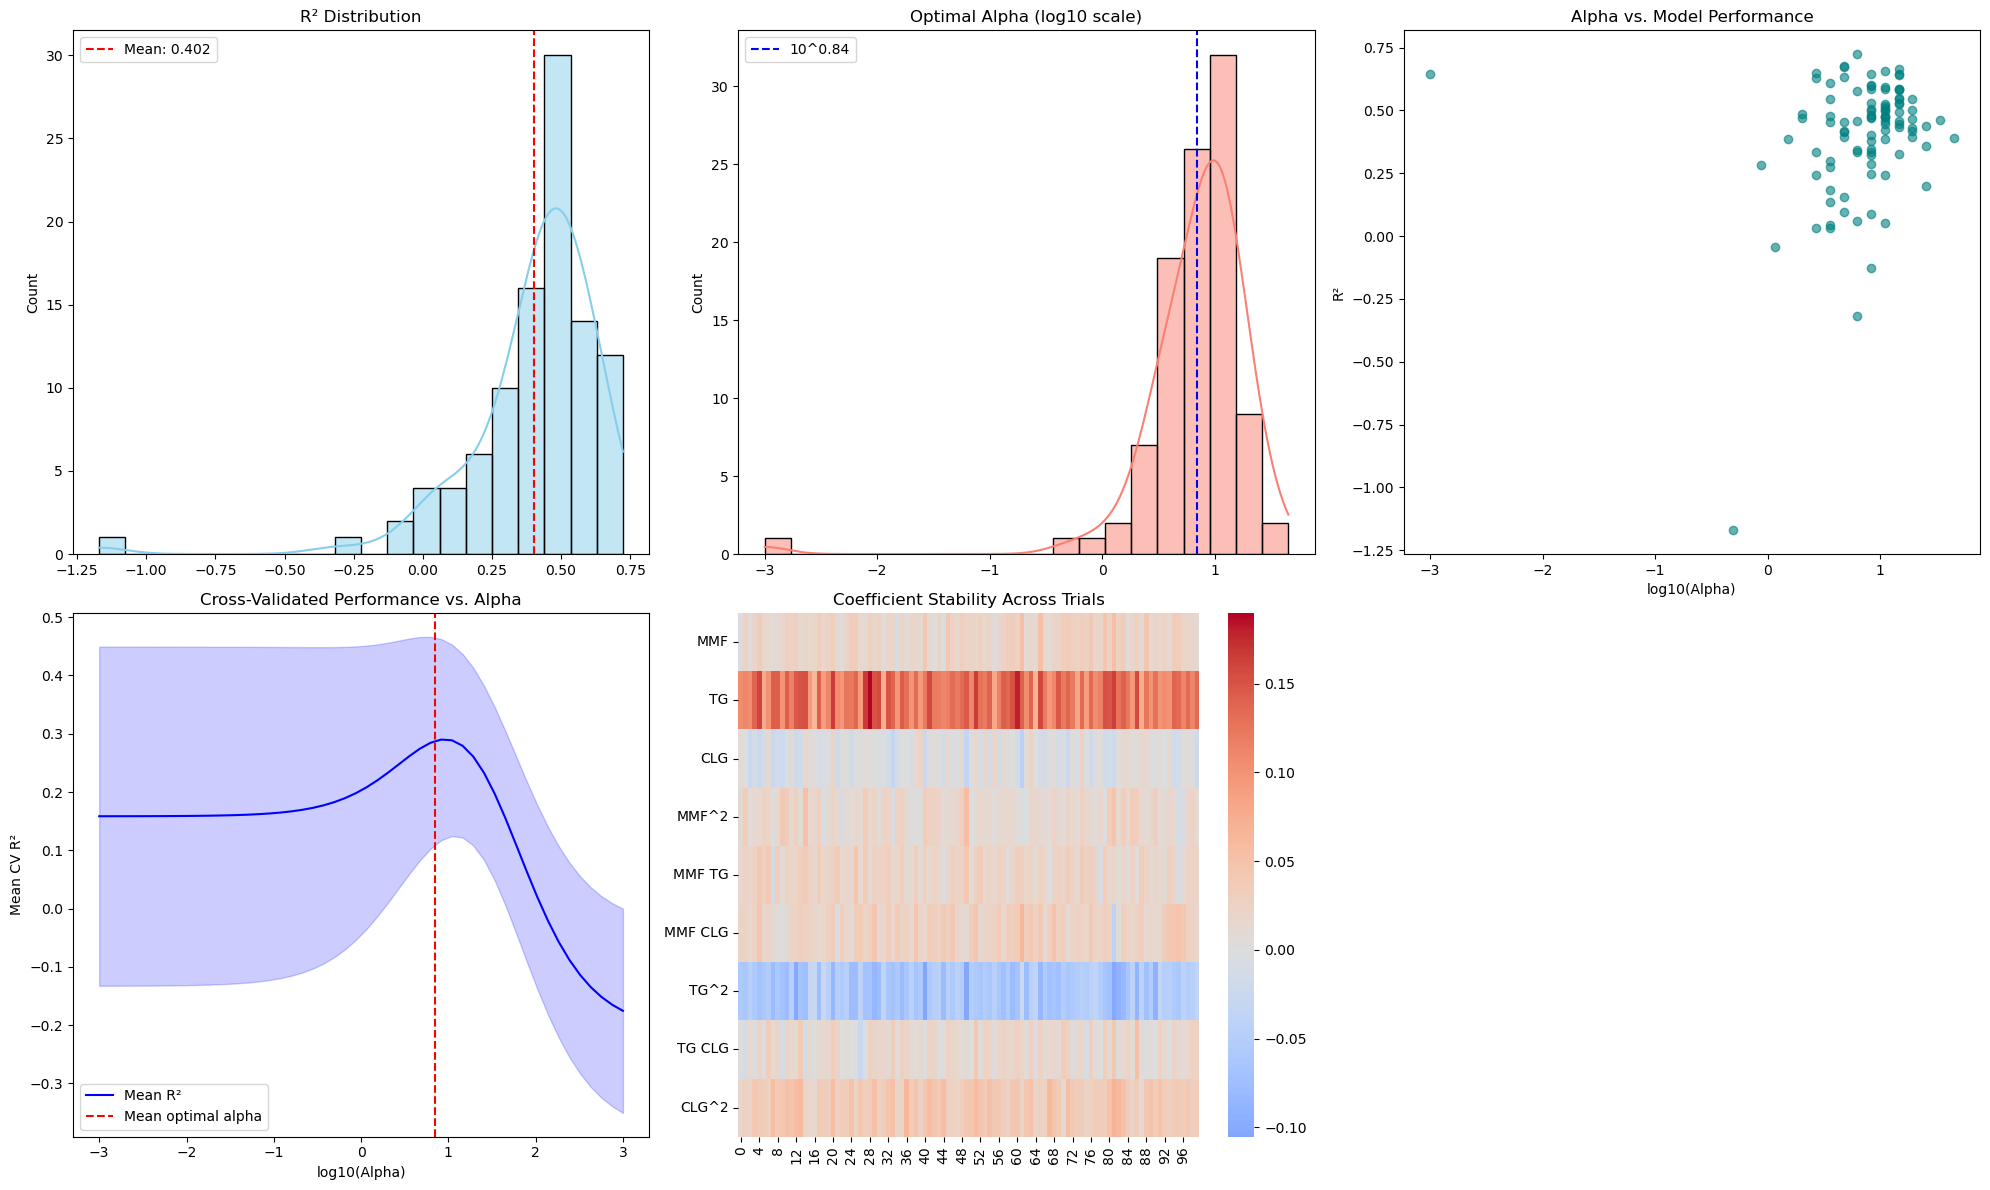


=== Performance Summary ===
Mean R²: 0.402 ± 0.248
Best R²: 0.724 (α=6.25e+00)
Worst R²: -1.170 (α=4.94e-01)

=== Alpha Summary ===
Geometric Mean α: 7.00e+00
Median α: 8.29e+00
Range: 1.00e-03 to 4.50e+01

=== Most Stable Coefficients ===
   Feature      Mean       Std
4   MMF TG  0.021360  0.011241
0      MMF  0.022171  0.011925
8    CLG^2  0.038661  0.012421
3    MMF^2  0.016481  0.012701
5  MMF CLG  0.025529  0.013381


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline

# Load data
df = pd.read_csv('TPA_DPU2023_normalized_Gel_Strength.csv')

# Configuration
N_TRIALS = 100  # Number of random states to test
TEST_SIZE = 0.3  # Validation set size
DEGREE = 2      # Polynomial degree
ALPHAS = np.logspace(-3, 3, 50)  # Alpha range (log scale)

# Store results
r2_scores = []
best_alphas = []
coefficients = []
alpha_performance = []  # To store performance across alphas

for state in range(N_TRIALS):
    # Split data
    X = df.iloc[:, 0:3].values
    y = df.iloc[:, 3].values
    X_train, X_valid, y_train, y_valid = train_test_split(
        X, y, test_size=TEST_SIZE, random_state=state)
    
    # Create pipeline (without RidgeCV for now)
    pipeline = make_pipeline(
        StandardScaler(),
        PolynomialFeatures(degree=DEGREE, include_bias=False)
    )
    
    # Transform features
    X_train_poly = pipeline.fit_transform(X_train)
    X_valid_poly = pipeline.transform(X_valid)
    
    # Find best alpha using RidgeCV
    ridge_cv = RidgeCV(alphas=ALPHAS, cv=5)
    ridge_cv.fit(X_train_poly, y_train)
    best_alpha = ridge_cv.alpha_
    best_alphas.append(best_alpha)
    
    # Store performance across alphas for this trial
    trial_performance = []
    for alpha in ALPHAS:
        ridge = Ridge(alpha=alpha)
        scores = cross_val_score(ridge, X_train_poly, y_train, 
                               cv=5, scoring='r2')
        trial_performance.append(np.mean(scores))
    alpha_performance.append(trial_performance)
    
    # Train with best alpha and evaluate
    ridge = Ridge(alpha=best_alpha).fit(X_train_poly, y_train)
    y_pred = ridge.predict(X_valid_poly)
    r2_scores.append(r2_score(y_valid, y_pred))
    coefficients.append(ridge.coef_)

# Convert to numpy arrays
r2_scores = np.array(r2_scores)
best_alphas = np.array(best_alphas)
coefficients = np.array(coefficients)
alpha_performance = np.array(alpha_performance)  # Shape: (n_trials, n_alphas)

# --- Visualization ---
plt.figure(figsize=(20, 12))

# 1. R² Distribution
plt.subplot(2, 3, 1)
sns.histplot(r2_scores, bins=20, kde=True, color='skyblue')
plt.axvline(np.mean(r2_scores), color='red', linestyle='--', 
            label=f'Mean: {np.mean(r2_scores):.3f}')
plt.title('R² Distribution')
plt.legend()

# 2. Alpha Distribution (log scale)
plt.subplot(2, 3, 2)
sns.histplot(np.log10(best_alphas), bins=20, kde=True, color='salmon')
plt.axvline(np.mean(np.log10(best_alphas)), color='blue', linestyle='--',
            label=f'10^{np.mean(np.log10(best_alphas)):.2f}')
plt.title('Optimal Alpha (log10 scale)')
plt.legend()

# 3. Alpha vs. R²
plt.subplot(2, 3, 3)
plt.scatter(np.log10(best_alphas), r2_scores, alpha=0.6, color='teal')
plt.xlabel('log10(Alpha)')
plt.ylabel('R²')
plt.title('Alpha vs. Model Performance')

# 4. Mean CV R² vs. Alpha across trials
plt.subplot(2, 3, 4)
mean_performance = np.mean(alpha_performance, axis=0)
std_performance = np.std(alpha_performance, axis=0)
plt.plot(np.log10(ALPHAS), mean_performance, 'b-', label='Mean R²')
plt.fill_between(np.log10(ALPHAS), 
                mean_performance - std_performance,
                mean_performance + std_performance,
                alpha=0.2, color='blue')
plt.axvline(np.mean(np.log10(best_alphas)), color='r', linestyle='--', 
            label='Mean optimal alpha')
plt.xlabel('log10(Alpha)')
plt.ylabel('Mean CV R²')
plt.title('Cross-Validated Performance vs. Alpha')
plt.legend()

# 5. Coefficient Stability Heatmap
plt.subplot(2, 3, 5)
poly_feat_names = pipeline.named_steps['polynomialfeatures'].get_feature_names_out(['MMF', 'TG', 'CLG'])
coef_stability = pd.DataFrame(coefficients, columns=poly_feat_names)
sns.heatmap(coef_stability.T, cmap='coolwarm', center=0)
plt.title('Coefficient Stability Across Trials')

plt.tight_layout()
plt.show()

# --- Statistical Summary ---
print("\n=== Performance Summary ===")
print(f"Mean R²: {np.mean(r2_scores):.3f} ± {np.std(r2_scores):.3f}")
print(f"Best R²: {np.max(r2_scores):.3f} (α={best_alphas[np.argmax(r2_scores)]:.2e})")
print(f"Worst R²: {np.min(r2_scores):.3f} (α={best_alphas[np.argmin(r2_scores)]:.2e})")

print("\n=== Alpha Summary ===")
print(f"Geometric Mean α: {10**np.mean(np.log10(best_alphas)):.2e}")
print(f"Median α: {np.median(best_alphas):.2e}")
print(f"Range: {np.min(best_alphas):.2e} to {np.max(best_alphas):.2e}")

# Most stable coefficients (lowest std dev)
coef_stats = pd.DataFrame({
    'Feature': poly_feat_names,
    'Mean': np.mean(coefficients, axis=0),
    'Std': np.std(coefficients, axis=0)
}).sort_values('Std')

print("\n=== Most Stable Coefficients ===")
print(coef_stats.head(5))

# SVR Model

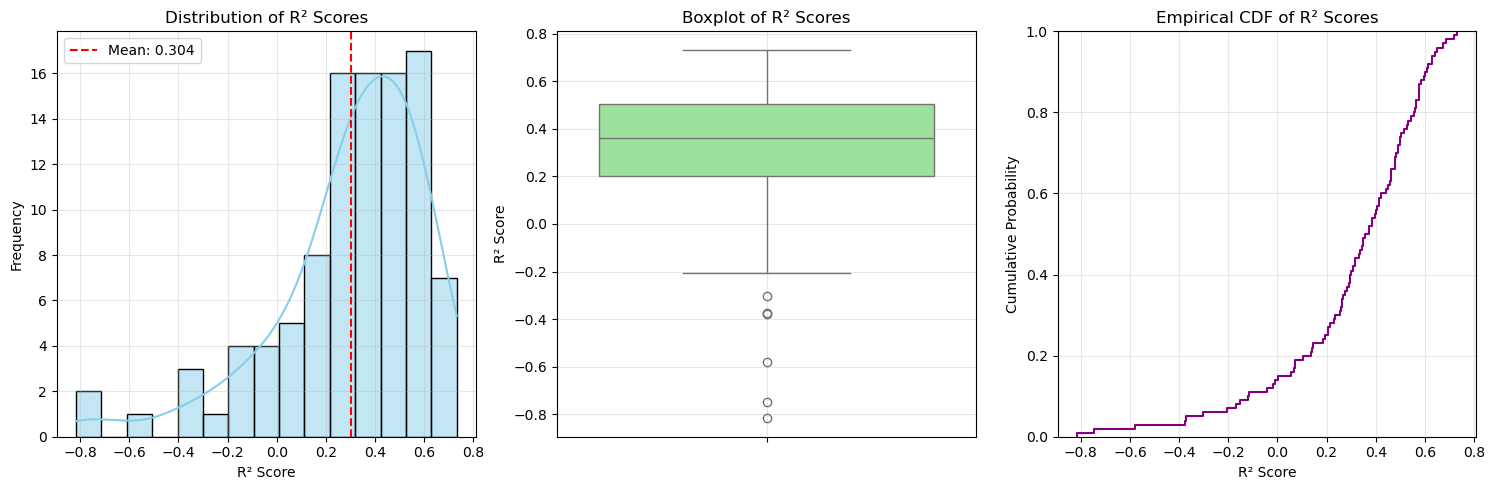


R² Score Statistics:
Mean: 0.3039
Median: 0.3629
Standard Deviation: 0.3023
Minimum: -0.8165
Maximum: 0.7320
5th Percentile: -0.3076
95th Percentile: 0.6406

Most frequent best parameters:
C          0.113274
epsilon    0.001098
gamma         scale
kernel          rbf
Name: 0, dtype: object

Best performance (R² = 0.7320) at random_state = 37
Parameters: {'C': np.float64(36.39867134617869), 'epsilon': np.float64(0.0011413294727907477), 'gamma': np.float64(0.05435377908549723), 'kernel': 'rbf'}

Worst performance (R² = -0.8165) at random_state = 61
Parameters: {'C': np.float64(5.196377289804581), 'epsilon': np.float64(0.07262652652083719), 'gamma': np.float64(0.05435377908549723), 'kernel': 'rbf'}


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from scipy.stats import loguniform, uniform

# Load your data
df = pd.read_csv('TPA_DPU2023_normalized_Gel_Strength.csv')

# Configuration
N_TRIALS = 100  # Reduced number due to SVR's computational complexity
TEST_SIZE = 0.3  # Validation set size

# SVR hyperparameter search space
param_dist = {
    'C': loguniform(1e-1, 1e3),
    'epsilon': loguniform(1e-3, 1e0),
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'] + list(loguniform(1e-3, 1e1).rvs(5))
}

# Store results
r2_scores = []
best_params = []

for state in range(N_TRIALS):
    
    # Split data
    X = df.iloc[:, 0:3].values  # Features (columns 1-3)
    y = df.iloc[:, 3].values     # Target (column 4)
    
    X_train, X_valid, y_train, y_valid = train_test_split(
        X, y, test_size=TEST_SIZE, random_state=state)
    
    # Create pipeline with scaling and SVR
    model = make_pipeline(
        StandardScaler(),
        RandomizedSearchCV(
            SVR(),
            param_distributions=param_dist,
            n_iter=20,  # Number of parameter settings sampled
            cv=3,       # 3-fold cross-validation
            random_state=state,
            n_jobs=-1
        )
    )
    
    # Train and evaluate
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    r2 = r2_score(y_valid, y_pred)
    
    r2_scores.append(r2)
    best_params.append(model.named_steps['randomizedsearchcv'].best_params_)

# Convert to numpy arrays
r2_scores = np.array(r2_scores)

# Create figure with multiple subplots
plt.figure(figsize=(15, 5))

# 1. Histogram of R² scores
plt.subplot(1, 3, 1)
sns.histplot(r2_scores, bins=15, kde=True, color='skyblue')
plt.axvline(np.mean(r2_scores), color='red', linestyle='--', 
            label=f'Mean: {np.mean(r2_scores):.3f}')
plt.xlabel('R² Score')
plt.ylabel('Frequency')
plt.title('Distribution of R² Scores')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Boxplot of R² scores
plt.subplot(1, 3, 2)
sns.boxplot(y=r2_scores, color='lightgreen')
plt.ylabel('R² Score')
plt.title('Boxplot of R² Scores')
plt.grid(True, alpha=0.3)

# 3. ECDF Plot
plt.subplot(1, 3, 3)
sns.ecdfplot(r2_scores, color='purple')
plt.xlabel('R² Score')
plt.ylabel('Cumulative Probability')
plt.title('Empirical CDF of R² Scores')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistical summary
print("\nR² Score Statistics:")
print(f"Mean: {np.mean(r2_scores):.4f}")
print(f"Median: {np.median(r2_scores):.4f}")
print(f"Standard Deviation: {np.std(r2_scores):.4f}")
print(f"Minimum: {np.min(r2_scores):.4f}")
print(f"Maximum: {np.max(r2_scores):.4f}")
print(f"5th Percentile: {np.percentile(r2_scores, 5):.4f}")
print(f"95th Percentile: {np.percentile(r2_scores, 95):.4f}")

# Analyze best parameters
best_df = pd.DataFrame(best_params)
print("\nMost frequent best parameters:")
print(best_df.mode().iloc[0])

# Best/worst cases
best_idx = np.argmax(r2_scores)
worst_idx = np.argmin(r2_scores)
print(f"\nBest performance (R² = {r2_scores[best_idx]:.4f}) at random_state = {best_idx}")
print(f"Parameters: {best_params[best_idx]}")
print(f"\nWorst performance (R² = {r2_scores[worst_idx]:.4f}) at random_state = {worst_idx}")
print(f"Parameters: {best_params[worst_idx]}")

# Tree Model

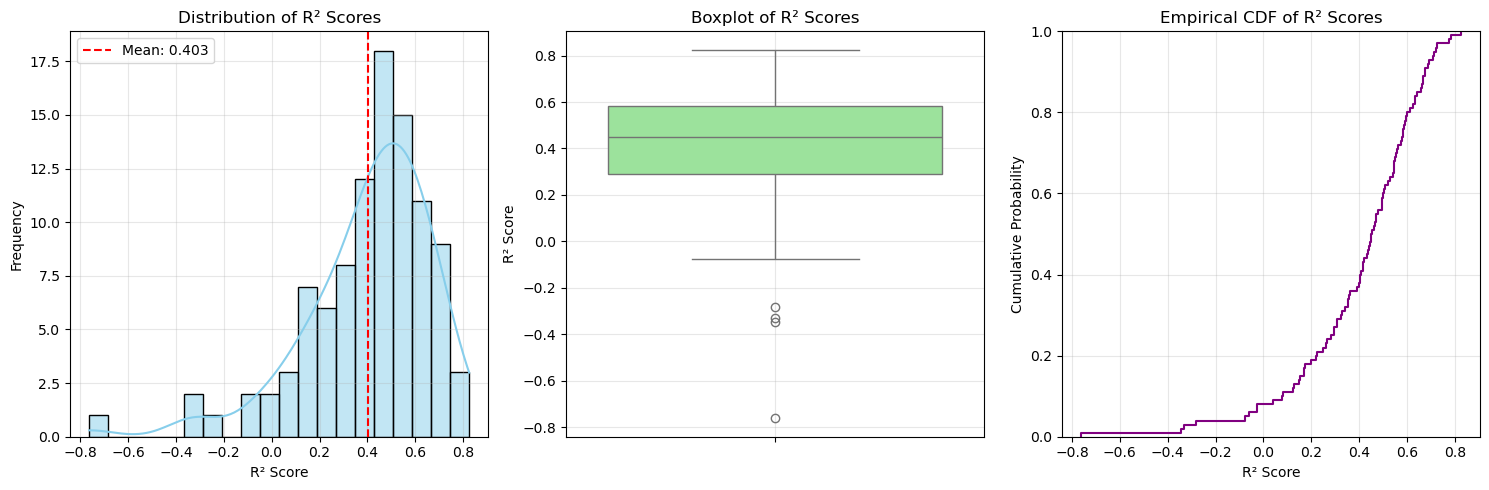


R² Score Statistics:
Mean: 0.4031
Median: 0.4503
Standard Deviation: 0.2651
Minimum: -0.7619
Maximum: 0.8252
5th Percentile: -0.0620
95th Percentile: 0.7137

Feature Importance Stability (Mean ± Std Dev):
MMF: 0.1115 ± 0.0459
TG: 0.7610 ± 0.0522
CLG: 0.1275 ± 0.0444

Best performance (R² = 0.8252) at random_state = 58
Worst performance (R² = -0.7619) at random_state = 80


In [11]:
# Load your data
df = pd.read_csv('TPA_DPU2023_normalized_Gel_Strength.csv')

# Configuration
N_TRIALS = 100  # Number of random states to test
TEST_SIZE = 0.3  # Validation set size

# Store results
r2_scores = []
feature_importances = []  # Instead of coefficients for Decision Tree

for state in range(N_TRIALS):
    # Split data
    X = df.iloc[:, 0:3].values  # Features (columns 1-3)
    y = df.iloc[:, 3].values     # Target (column 4)
    
    X_train, X_valid, y_train, y_valid = train_test_split(
        X, y, test_size=TEST_SIZE, random_state=state)
    
    # Standardize (not always necessary for Decision Trees, but kept for consistency)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_valid = scaler.transform(X_valid)
    
    # Train and evaluate Decision Tree Regressor
    model = DecisionTreeRegressor(random_state=state)  # Added random_state for reproducibility
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    r2 = r2_score(y_valid, y_pred)
    
    r2_scores.append(r2)
    feature_importances.append(model.feature_importances_)  # Store feature importances

# Convert to numpy arrays
r2_scores = np.array(r2_scores)
feature_importances = np.array(feature_importances)

# Create figure with multiple subplots
plt.figure(figsize=(15, 5))

# 1. Histogram of R² scores
plt.subplot(1, 3, 1)
sns.histplot(r2_scores, bins=20, kde=True, color='skyblue')
plt.axvline(np.mean(r2_scores), color='red', linestyle='--', 
            label=f'Mean: {np.mean(r2_scores):.3f}')
plt.xlabel('R² Score')
plt.ylabel('Frequency')
plt.title('Distribution of R² Scores')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Boxplot of R² scores
plt.subplot(1, 3, 2)
sns.boxplot(y=r2_scores, color='lightgreen')
plt.ylabel('R² Score')
plt.title('Boxplot of R² Scores')
plt.grid(True, alpha=0.3)

# 3. ECDF Plot
plt.subplot(1, 3, 3)
sns.ecdfplot(r2_scores, color='purple')
plt.xlabel('R² Score')
plt.ylabel('Cumulative Probability')
plt.title('Empirical CDF of R² Scores')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistical summary
print("\nR² Score Statistics:")
print(f"Mean: {np.mean(r2_scores):.4f}")
print(f"Median: {np.median(r2_scores):.4f}")
print(f"Standard Deviation: {np.std(r2_scores):.4f}")
print(f"Minimum: {np.min(r2_scores):.4f}")
print(f"Maximum: {np.max(r2_scores):.4f}")
print(f"5th Percentile: {np.percentile(r2_scores, 5):.4f}")
print(f"95th Percentile: {np.percentile(r2_scores, 95):.4f}")

# Feature importance stability analysis
print("\nFeature Importance Stability (Mean ± Std Dev):")
for i, col in enumerate(['MMF', 'TG', 'CLG']):
    print(f"{col}: {np.mean(feature_importances[:, i]):.4f} ± {np.std(feature_importances[:, i]):.4f}")

# Best/worst cases
best_idx = np.argmax(r2_scores)
worst_idx = np.argmin(r2_scores)
print(f"\nBest performance (R² = {r2_scores[best_idx]:.4f}) at random_state = {best_idx}")
print(f"Worst performance (R² = {r2_scores[worst_idx]:.4f}) at random_state = {worst_idx}")

# Random Forest Regressor

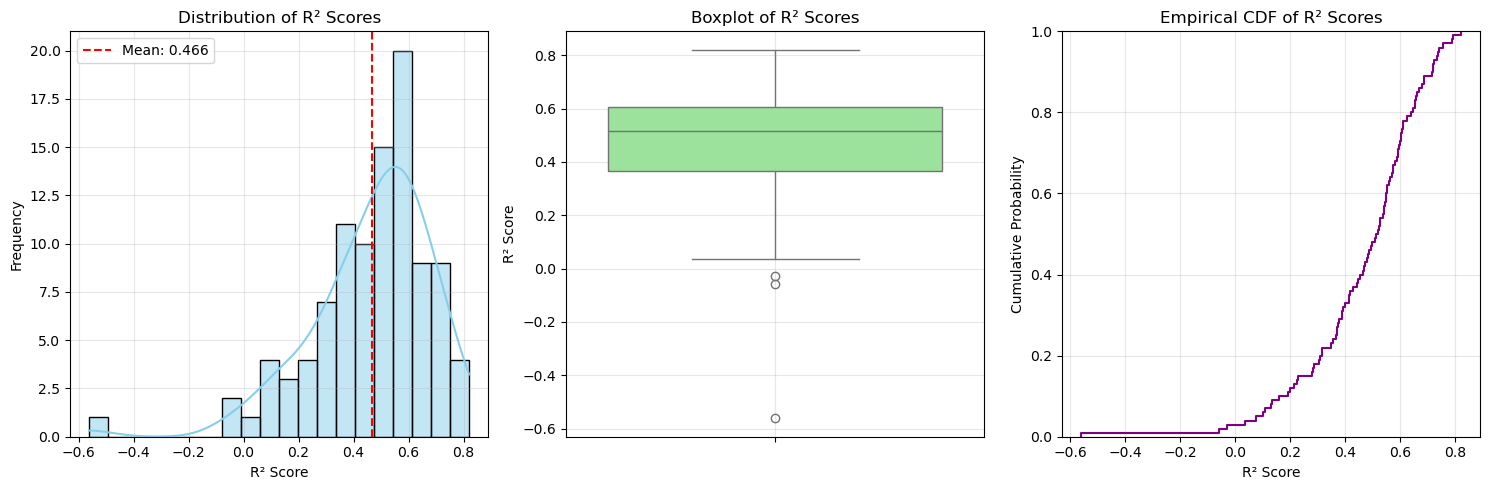


R² Score Statistics:
Mean: 0.4658
Median: 0.5156
Standard Deviation: 0.2178
Minimum: -0.5612
Maximum: 0.8205
5th Percentile: 0.0981
95th Percentile: 0.7355

Feature Importance Stability (Mean ± Std Dev):
MMF: 0.1210 ± 0.0267
TG: 0.7249 ± 0.0487
CLG: 0.1541 ± 0.0345


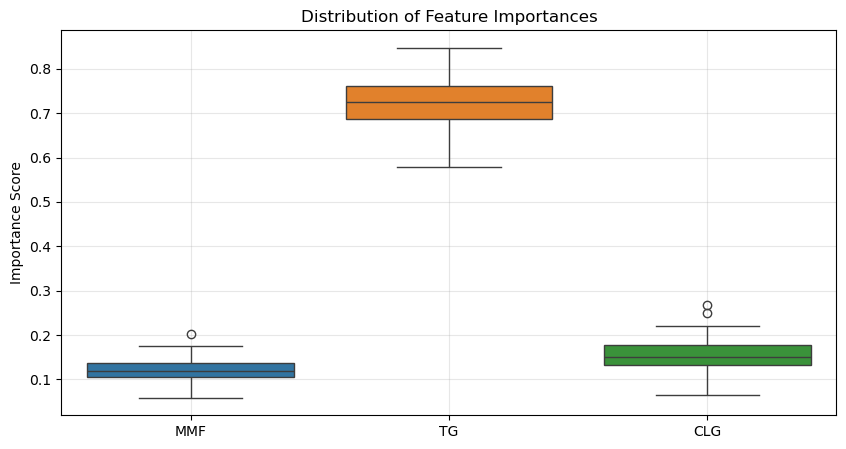


Best performance (R² = 0.8205) at random_state = 58
Worst performance (R² = -0.5612) at random_state = 80


In [12]:
# Load your data
df = pd.read_csv('TPA_DPU2023_normalized_Gel_Strength.csv')

# Configuration
N_TRIALS = 100  # Number of random states to test
TEST_SIZE = 0.3  # Validation set size

# Store results
r2_scores = []
feature_importances = []

for state in range(N_TRIALS):
    # Split data
    X = df.iloc[:, 0:3].values  # Features (columns 1-3)
    y = df.iloc[:, 3].values     # Target (column 4)
    
    X_train, X_valid, y_train, y_valid = train_test_split(
        X, y, test_size=TEST_SIZE, random_state=state)
    
    # Standardize (optional for Random Forest, but can be done)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_valid = scaler.transform(X_valid)
    
    # Train and evaluate Random Forest
    model = RandomForestRegressor(random_state=state)  # Set random_state for reproducibility
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    r2 = r2_score(y_valid, y_pred)
    
    r2_scores.append(r2)
    feature_importances.append(model.feature_importances_)  # Store feature importances

# Convert to numpy arrays
r2_scores = np.array(r2_scores)
feature_importances = np.array(feature_importances)

# Create figure with multiple subplots
plt.figure(figsize=(15, 5))

# 1. Histogram of R² scores
plt.subplot(1, 3, 1)
sns.histplot(r2_scores, bins=20, kde=True, color='skyblue')
plt.axvline(np.mean(r2_scores), color='red', linestyle='--', 
            label=f'Mean: {np.mean(r2_scores):.3f}')
plt.xlabel('R² Score')
plt.ylabel('Frequency')
plt.title('Distribution of R² Scores')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Boxplot of R² scores
plt.subplot(1, 3, 2)
sns.boxplot(y=r2_scores, color='lightgreen')
plt.ylabel('R² Score')
plt.title('Boxplot of R² Scores')
plt.grid(True, alpha=0.3)

# 3. ECDF Plot
plt.subplot(1, 3, 3)
sns.ecdfplot(r2_scores, color='purple')
plt.xlabel('R² Score')
plt.ylabel('Cumulative Probability')
plt.title('Empirical CDF of R² Scores')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistical summary
print("\nR² Score Statistics:")
print(f"Mean: {np.mean(r2_scores):.4f}")
print(f"Median: {np.median(r2_scores):.4f}")
print(f"Standard Deviation: {np.std(r2_scores):.4f}")
print(f"Minimum: {np.min(r2_scores):.4f}")
print(f"Maximum: {np.max(r2_scores):.4f}")
print(f"5th Percentile: {np.percentile(r2_scores, 5):.4f}")
print(f"95th Percentile: {np.percentile(r2_scores, 95):.4f}")

# Feature importance analysis
print("\nFeature Importance Stability (Mean ± Std Dev):")
feature_names = ['MMF', 'TG', 'CLG']
for i, col in enumerate(feature_names):
    print(f"{col}: {np.mean(feature_importances[:, i]):.4f} ± {np.std(feature_importances[:, i]):.4f}")

# Plot feature importances
plt.figure(figsize=(10, 5))
sns.boxplot(data=pd.DataFrame(feature_importances, columns=feature_names))
plt.title('Distribution of Feature Importances')
plt.ylabel('Importance Score')
plt.grid(True, alpha=0.3)
plt.show()

# Best/worst cases
best_idx = np.argmax(r2_scores)
worst_idx = np.argmin(r2_scores)
print(f"\nBest performance (R² = {r2_scores[best_idx]:.4f}) at random_state = {best_idx}")
print(f"Worst performance (R² = {r2_scores[worst_idx]:.4f}) at random_state = {worst_idx}")

# Gradient Boosting Regressor

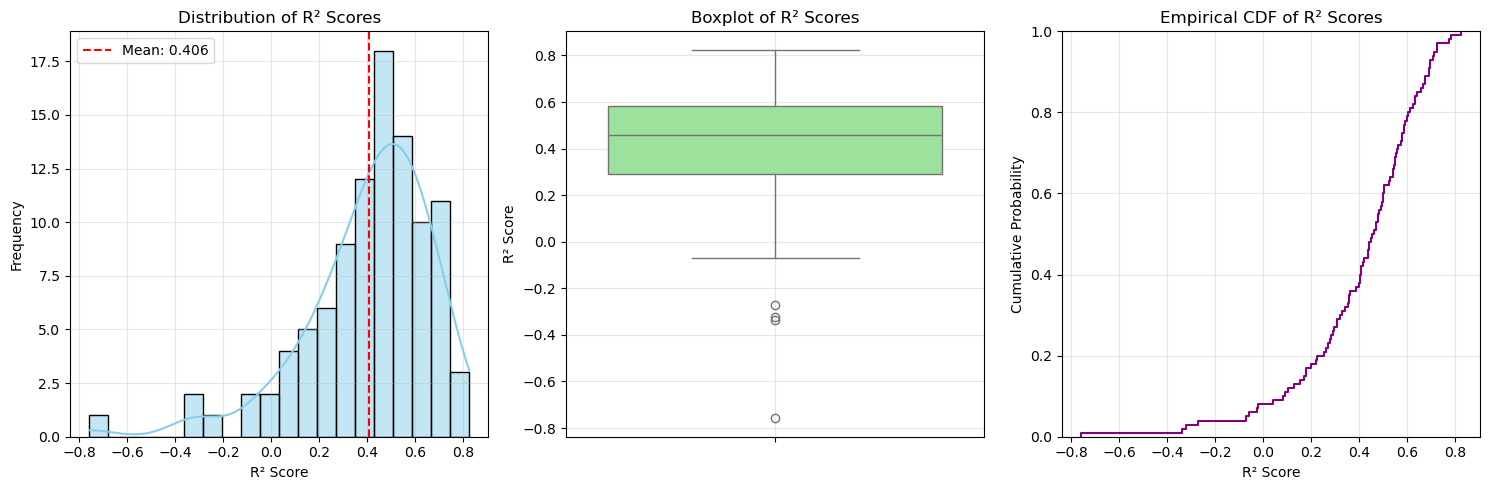


R² Score Statistics:
Mean: 0.4063
Median: 0.4583
Standard Deviation: 0.2637
Minimum: -0.7580
Maximum: 0.8244
5th Percentile: -0.0579
95th Percentile: 0.7143

Feature Importance Stability (Mean ± Std Dev):
MMF: 0.0900 ± 0.0351
TG: 0.7697 ± 0.0520
CLG: 0.1403 ± 0.0431

Best performance (R² = 0.8244) at random_state = 58
Worst performance (R² = -0.7580) at random_state = 80


In [13]:
# Load your data
df = pd.read_csv('TPA_DPU2023_normalized_Gel_Strength.csv')

# Configuration
N_TRIALS = 100  # Number of random states to test
TEST_SIZE = 0.3  # Validation set size

# Store results
r2_scores = []
feature_importances = []  # Instead of coefficients for tree-based models

for state in range(N_TRIALS):
    # Split data
    X = df.iloc[:, 0:3].values  # Features (columns 1-3)
    y = df.iloc[:, 3].values     # Target (column 4)
    
    X_train, X_valid, y_train, y_valid = train_test_split(
        X, y, test_size=TEST_SIZE, random_state=state)
    
    # Standardize (optional for tree-based models, but can sometimes help)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_valid = scaler.transform(X_valid)
    
    # Train and evaluate Gradient Boosting model
    model = GradientBoostingRegressor(
        n_estimators=100,  # Number of boosting stages
        learning_rate=0.1,  # Shrinkage factor
        max_depth=3,       # Maximum depth of individual trees
        random_state=state # For reproducibility
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    r2 = r2_score(y_valid, y_pred)
    
    r2_scores.append(r2)
    feature_importances.append(model.feature_importances_)  # Get feature importances

# Convert to numpy arrays
r2_scores = np.array(r2_scores)
feature_importances = np.array(feature_importances)

# Create figure with multiple subplots
plt.figure(figsize=(15, 5))

# 1. Histogram of R² scores
plt.subplot(1, 3, 1)
sns.histplot(r2_scores, bins=20, kde=True, color='skyblue')
plt.axvline(np.mean(r2_scores), color='red', linestyle='--', 
            label=f'Mean: {np.mean(r2_scores):.3f}')
plt.xlabel('R² Score')
plt.ylabel('Frequency')
plt.title('Distribution of R² Scores')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Boxplot of R² scores
plt.subplot(1, 3, 2)
sns.boxplot(y=r2_scores, color='lightgreen')
plt.ylabel('R² Score')
plt.title('Boxplot of R² Scores')
plt.grid(True, alpha=0.3)

# 3. ECDF Plot
plt.subplot(1, 3, 3)
sns.ecdfplot(r2_scores, color='purple')
plt.xlabel('R² Score')
plt.ylabel('Cumulative Probability')
plt.title('Empirical CDF of R² Scores')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistical summary
print("\nR² Score Statistics:")
print(f"Mean: {np.mean(r2_scores):.4f}")
print(f"Median: {np.median(r2_scores):.4f}")
print(f"Standard Deviation: {np.std(r2_scores):.4f}")
print(f"Minimum: {np.min(r2_scores):.4f}")
print(f"Maximum: {np.max(r2_scores):.4f}")
print(f"5th Percentile: {np.percentile(r2_scores, 5):.4f}")
print(f"95th Percentile: {np.percentile(r2_scores, 95):.4f}")

# Feature importance stability analysis
print("\nFeature Importance Stability (Mean ± Std Dev):")
for i, col in enumerate(['MMF', 'TG', 'CLG']):
    print(f"{col}: {np.mean(feature_importances[:, i]):.4f} ± {np.std(feature_importances[:, i]):.4f}")

# Best/worst cases
best_idx = np.argmax(r2_scores)
worst_idx = np.argmin(r2_scores)
print(f"\nBest performance (R² = {r2_scores[best_idx]:.4f}) at random_state = {best_idx}")
print(f"Worst performance (R² = {r2_scores[worst_idx]:.4f}) at random_state = {worst_idx}")

Fitting 5 folds for each of 64 candidates, totalling 320 fits

Best Hyperparameters:
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}

Validation R² Score: 0.5863

Feature Importances:
MMF: 0.0249
TG: 0.8465
CLG: 0.1286


C:\Users\15157\AppData\Local\Temp\ipykernel_19500\1097577467.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['MMF', 'TG', 'CLG'], y=feature_importances, palette='viridis')


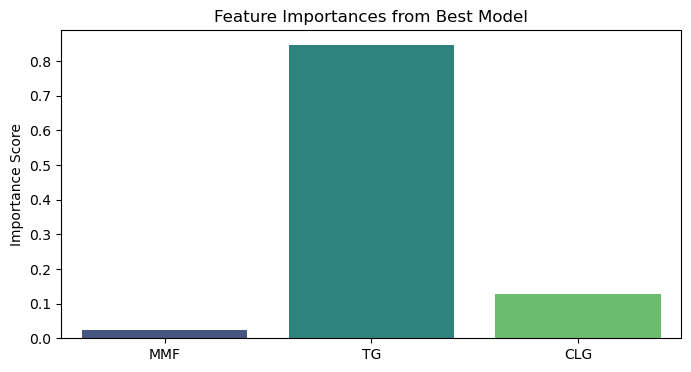

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Load data
df = pd.read_csv('TPA_DPU2023_normalized_Gel_Strength.csv')

# Configuration
TEST_SIZE = 0.3  # Validation set size
RANDOM_STATE = 42  # Fixed random state for reproducibility

# Split data
X = df.iloc[:, 0:3].values  # Features (columns 1-3)
y = df.iloc[:, 3].values     # Target (column 4)
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

# Standardize (optional for tree-based models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

# Define hyperparameter search space
param_grid = {
    'n_estimators': [50, 100, 200, 300],  # Number of trees
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Shrinkage
    'max_depth': [3, 4, 5, 6],  # Tree depth
}

# Initialize model
gb = GradientBoostingRegressor(random_state=RANDOM_STATE)

# Option 1: GridSearchCV (exhaustive but slower)
search = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    scoring='r2',  # Maximize R²
    cv=5,          # 5-fold cross-validation
    n_jobs=-1,     # Use all CPU cores
    verbose=1      # Print progress
)

# Option 2: RandomizedSearchCV (faster for large search spaces)
# search = RandomizedSearchCV(
#     estimator=gb,
#     param_distributions=param_grid,
#     n_iter=20,     # Number of random combinations
#     scoring='r2',
#     cv=5,
#     random_state=RANDOM_STATE,
#     n_jobs=-1,
#     verbose=1
# )

# Fit the search
search.fit(X_train, y_train)

# Best hyperparameters
print("\nBest Hyperparameters:")
print(search.best_params_)

# Evaluate on validation set
best_model = search.best_estimator_
y_pred = best_model.predict(X_valid)
r2 = r2_score(y_valid, y_pred)
print(f"\nValidation R² Score: {r2:.4f}")

# Feature importances
feature_importances = best_model.feature_importances_
print("\nFeature Importances:")
for i, col in enumerate(['MMF', 'TG', 'CLG']):
    print(f"{col}: {feature_importances[i]:.4f}")

# Plot feature importances
plt.figure(figsize=(8, 4))
sns.barplot(x=['MMF', 'TG', 'CLG'], y=feature_importances, palette='viridis')
plt.title('Feature Importances from Best Model')
plt.ylabel('Importance Score')
plt.show()

# Bayesian Model

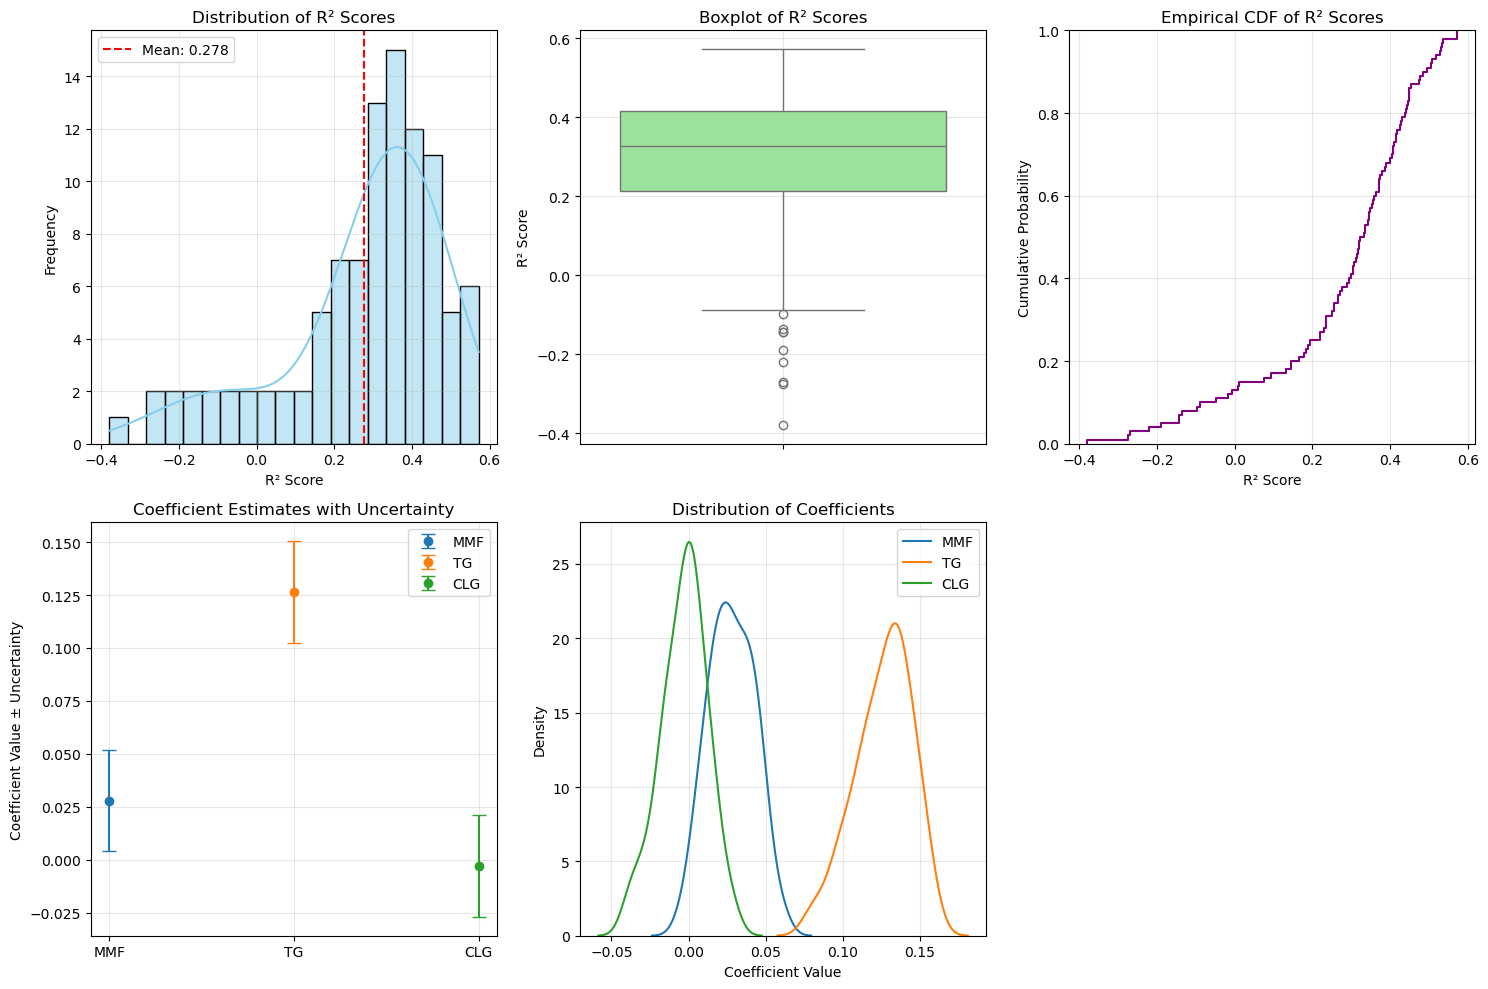


R² Score Statistics:
Mean: 0.2775
Median: 0.3277
Standard Deviation: 0.2063
Minimum: -0.3796
Maximum: 0.5720
5th Percentile: -0.1465
95th Percentile: 0.5294

Bayesian Coefficient Analysis (Mean ± Uncertainty):
MMF: 0.0279 ± 0.0240
TG: 0.1264 ± 0.0240
CLG: -0.0030 ± 0.0240

Best performance (R² = 0.5720) at random_state = 64
Worst performance (R² = -0.3796) at random_state = 80


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import BayesianRidge

# Load your data
df = pd.read_csv('TPA_DPU2023_normalized_Gel_Strength.csv')

# Configuration
N_TRIALS = 100  # Number of random states to test
TEST_SIZE = 0.3  # Validation set size

# Store results
r2_scores = []
coefficients = []
coef_uncertainties = []  # To store coefficient uncertainties

for state in range(N_TRIALS):
    # Split data
    X = df.iloc[:, 0:3].values  # Features (columns 1-3)
    y = df.iloc[:, 3].values     # Target (column 4)
    
    X_train, X_valid, y_train, y_valid = train_test_split(
        X, y, test_size=TEST_SIZE, random_state=state)
    
    # Standardize
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_valid = scaler.transform(X_valid)
    
    # Bayesian Ridge Regression - updated parameters
    model = BayesianRidge(
        max_iter=300,  # Changed from n_iter to max_iter
        compute_score=True,
        verbose=False
    )
    
    model.fit(X_train, y_train)
    y_pred, y_std = model.predict(X_valid, return_std=True)
    r2 = r2_score(y_valid, y_pred)
    
    r2_scores.append(r2)
    coefficients.append(model.coef_)
    coef_uncertainties.append(np.sqrt(np.diag(model.sigma_)))  # Standard deviation of coefficients

# Convert to numpy arrays
r2_scores = np.array(r2_scores)
coefficients = np.array(coefficients)
coef_uncertainties = np.array(coef_uncertainties)

# Create figure with multiple subplots
plt.figure(figsize=(15, 10))

# 1. Histogram of R² scores
plt.subplot(2, 3, 1)
sns.histplot(r2_scores, bins=20, kde=True, color='skyblue')
plt.axvline(np.mean(r2_scores), color='red', linestyle='--', 
            label=f'Mean: {np.mean(r2_scores):.3f}')
plt.xlabel('R² Score')
plt.ylabel('Frequency')
plt.title('Distribution of R² Scores')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Boxplot of R² scores
plt.subplot(2, 3, 2)
sns.boxplot(y=r2_scores, color='lightgreen')
plt.ylabel('R² Score')
plt.title('Boxplot of R² Scores')
plt.grid(True, alpha=0.3)

# 3. ECDF Plot
plt.subplot(2, 3, 3)
sns.ecdfplot(r2_scores, color='purple')
plt.xlabel('R² Score')
plt.ylabel('Cumulative Probability')
plt.title('Empirical CDF of R² Scores')
plt.grid(True, alpha=0.3)

# 4. Coefficient uncertainty plot
plt.subplot(2, 3, 4)
for i, col in enumerate(['MMF', 'TG', 'CLG']):
    plt.errorbar(x=i, y=np.mean(coefficients[:, i]), 
                 yerr=np.mean(coef_uncertainties[:, i]),
                 fmt='o', label=col, capsize=5)
plt.xticks([0, 1, 2], ['MMF', 'TG', 'CLG'])
plt.ylabel('Coefficient Value ± Uncertainty')
plt.title('Coefficient Estimates with Uncertainty')
plt.legend()
plt.grid(True, alpha=0.3)

# 5. Coefficient distribution plot
plt.subplot(2, 3, 5)
for i, col in enumerate(['MMF', 'TG', 'CLG']):
    sns.kdeplot(coefficients[:, i], label=col)
plt.xlabel('Coefficient Value')
plt.ylabel('Density')
plt.title('Distribution of Coefficients')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistical summary
print("\nR² Score Statistics:")
print(f"Mean: {np.mean(r2_scores):.4f}")
print(f"Median: {np.median(r2_scores):.4f}")
print(f"Standard Deviation: {np.std(r2_scores):.4f}")
print(f"Minimum: {np.min(r2_scores):.4f}")
print(f"Maximum: {np.max(r2_scores):.4f}")
print(f"5th Percentile: {np.percentile(r2_scores, 5):.4f}")
print(f"95th Percentile: {np.percentile(r2_scores, 95):.4f}")

# Bayesian coefficient analysis
print("\nBayesian Coefficient Analysis (Mean ± Uncertainty):")
for i, col in enumerate(['MMF', 'TG', 'CLG']):
    mean_coef = np.mean(coefficients[:, i])
    mean_uncertainty = np.mean(coef_uncertainties[:, i])
    print(f"{col}: {mean_coef:.4f} ± {mean_uncertainty:.4f}")

# Best/worst cases
best_idx = np.argmax(r2_scores)
worst_idx = np.argmin(r2_scores)
print(f"\nBest performance (R² = {r2_scores[best_idx]:.4f}) at random_state = {best_idx}")
print(f"Worst performance (R² = {r2_scores[worst_idx]:.4f}) at random_state = {worst_idx}")


Hyperparameter statistics across trials:
       bayesianridge__alpha_1  bayesianridge__alpha_2  \
count            1.000000e+02            1.000000e+02   
mean             7.112651e-04            3.712152e-03   
std              1.908713e-03            3.431304e-03   
min              1.143296e-09            1.975305e-09   
25%              9.589010e-08            9.841654e-05   
50%              9.466915e-06            3.382188e-03   
75%              1.507932e-04            7.045796e-03   
max              9.539484e-03            9.917048e-03   

       bayesianridge__lambda_1  bayesianridge__lambda_2  \
count             1.000000e+02             1.000000e+02   
mean              5.091569e-04             1.827693e-03   
std               1.431297e-03             2.919006e-03   
min               1.065707e-09             1.129375e-09   
25%               6.847711e-08             8.381490e-08   
50%               4.730614e-06             2.257063e-05   
75%               1.603143e-04 

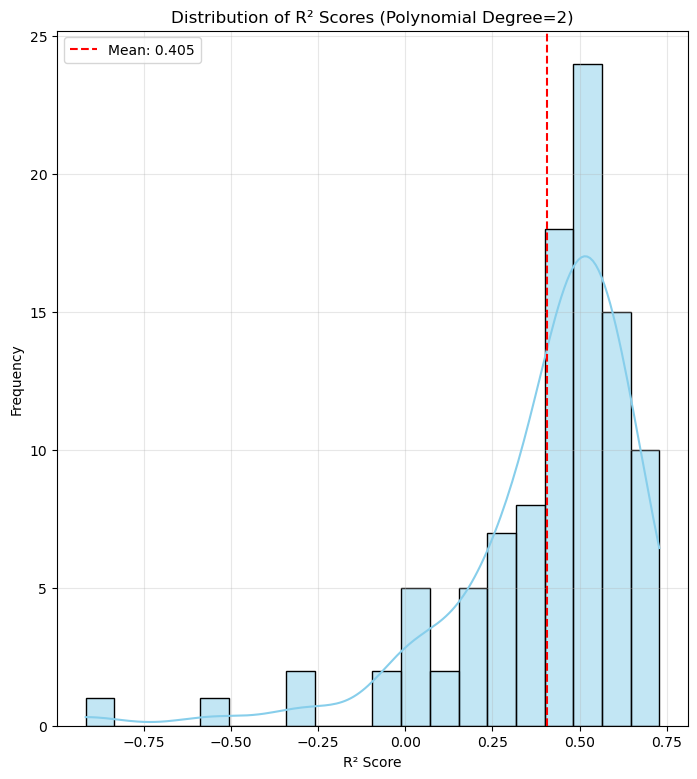


R² Score Statistics:
Mean: 0.4055
Median: 0.4768
Standard Deviation: 0.2638
Minimum: -0.9164
Maximum: 0.7288
5th Percentile: -0.0211
95th Percentile: 0.6721


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.linear_model import BayesianRidge
from sklearn.pipeline import make_pipeline
from scipy.stats import loguniform

# Load your data
df = pd.read_csv('TPA_DPU2023_normalized_Gel_Strength.csv')

# Configuration
N_TRIALS = 100  # Number of random states to test
TEST_SIZE = 0.3  # Validation set size
POLY_DEGREE = 2  # Degree of polynomial features

# Hyperparameter search space
param_dist = {
    'bayesianridge__alpha_1': loguniform(1e-9, 1e-2),
    'bayesianridge__alpha_2': loguniform(1e-9, 1e-2),
    'bayesianridge__lambda_1': loguniform(1e-9, 1e-2),
    'bayesianridge__lambda_2': loguniform(1e-9, 1e-2),
    'bayesianridge__tol': [1e-3, 1e-4, 1e-5],
    'bayesianridge__max_iter': [200, 300, 500, 1000]
}

# Store results
r2_scores = []
coefficients = []
coef_uncertainties = []
best_params = []
feature_names = []

for state in range(N_TRIALS):
    try:
        # Split data
        X = df.iloc[:, 0:3].values  # Features (columns 1-3)
        y = df.iloc[:, 3].values     # Target (column 4)
        
        X_train, X_valid, y_train, y_valid = train_test_split(
            X, y, test_size=TEST_SIZE, random_state=state)
        
        # Create pipeline
        pipe = make_pipeline(
            StandardScaler(),
            PolynomialFeatures(degree=POLY_DEGREE, include_bias=False),
            BayesianRidge(compute_score=True)
        )
        
        # RandomizedSearchCV
        model = RandomizedSearchCV(
            pipe,
            param_distributions=param_dist,
            n_iter=20,
            cv=5,
            n_jobs=-1,
            verbose=0,
            random_state=state
        )
        
        model.fit(X_train, y_train)
        
        # Get the best model
        best_model = model.best_estimator_
        best_params.append(model.best_params_)
        
        # Get polynomial feature names (only once)
        if len(feature_names) == 0:  # Explicit length check
            poly = best_model.named_steps['polynomialfeatures']
            original_features = ['MMF', 'TG', 'CLG']
            feature_names = poly.get_feature_names_out(input_features=original_features)
        
        # Make predictions
        y_pred = best_model.predict(X_valid)
        r2 = r2_score(y_valid, y_pred)
        
        r2_scores.append(r2)
        
        # Store coefficients and uncertainties
        br_model = best_model.named_steps['bayesianridge']
        coefficients.append(br_model.coef_)
        if hasattr(br_model, 'sigma_'):  # Check if sigma_ exists
            coef_uncertainties.append(np.sqrt(np.diag(br_model.sigma_)))
        else:
            coef_uncertainties.append(np.zeros_like(br_model.coef_))
            
    except Exception as e:
        print(f"Error at random_state={state}: {str(e)}")
        continue

# Convert to numpy arrays with proper checks
r2_scores = np.array(r2_scores) if len(r2_scores) > 0 else np.array([])
coefficients = np.array(coefficients) if len(coefficients) > 0 else np.array([])
coef_uncertainties = np.array(coef_uncertainties) if len(coef_uncertainties) > 0 else np.array([])

# Only proceed if we have results
if len(r2_scores) > 0:
    # Analyze best parameters across trials
    param_stats = pd.DataFrame(best_params).describe()
    print("\nHyperparameter statistics across trials:")
    print(param_stats)

    # Create figure with multiple subplots
    plt.figure(figsize=(20, 15))

    # 1. Histogram of R² scores
    plt.subplot(2, 3, 1)
    sns.histplot(r2_scores, bins=20, kde=True, color='skyblue')
    plt.axvline(np.mean(r2_scores), color='red', linestyle='--', 
                label=f'Mean: {np.mean(r2_scores):.3f}')
    plt.xlabel('R² Score')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of R² Scores (Polynomial Degree={POLY_DEGREE})')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # [Rest of your plotting code...]
    plt.tight_layout()
    plt.show()

    # Statistical summary
    print("\nR² Score Statistics:")
    print(f"Mean: {np.mean(r2_scores):.4f}")
    print(f"Median: {np.median(r2_scores):.4f}")
    print(f"Standard Deviation: {np.std(r2_scores):.4f}")
    print(f"Minimum: {np.min(r2_scores):.4f}")
    print(f"Maximum: {np.max(r2_scores):.4f}")
    print(f"5th Percentile: {np.percentile(r2_scores, 5):.4f}")
    print(f"95th Percentile: {np.percentile(r2_scores, 95):.4f}")

else:
    print("No successful trials - check your data and model configuration")

# ARD Regression

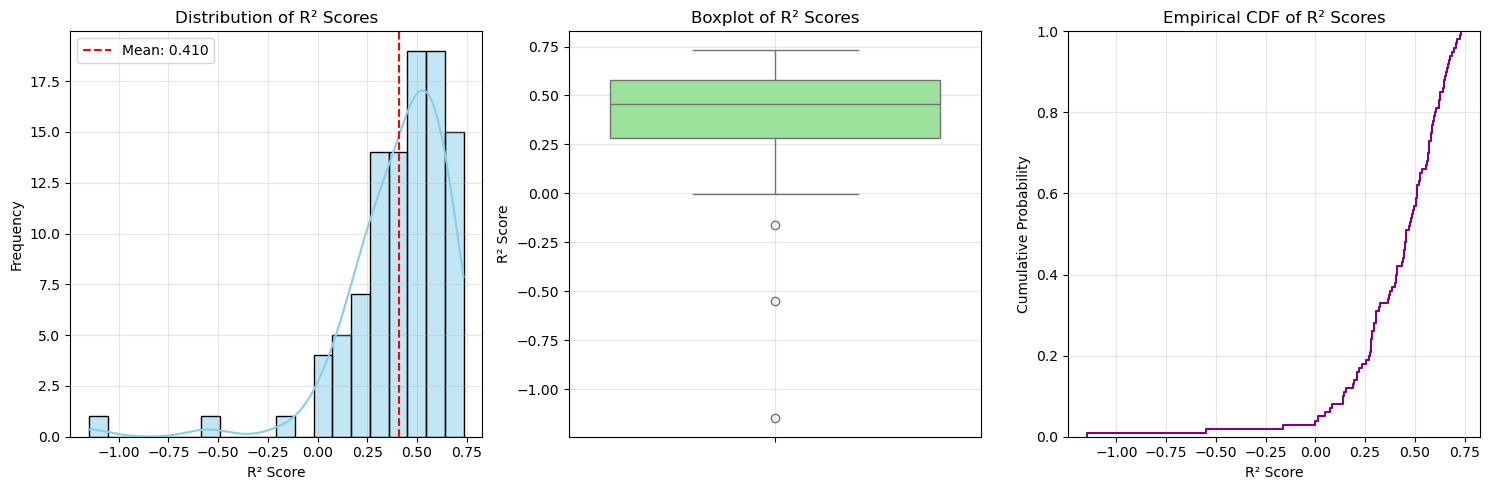


R² Score Statistics:
Mean: 0.4103
Median: 0.4549
Standard Deviation: 0.2641
Minimum: -1.1494
Maximum: 0.7335
5th Percentile: 0.0471
95th Percentile: 0.6880

Coefficient Stability (Mean ± Std Dev):
MMF: 0.0158 ± 0.0145
TG: 0.1525 ± 0.0210
CLG: -0.0019 ± 0.0083
MMF^2: 0.0091 ± 0.0136
MMF TG: 0.0141 ± 0.0131
MMF CLG: 0.0195 ± 0.0165
TG^2: -0.0759 ± 0.0170
TG CLG: 0.0064 ± 0.0108
CLG^2: 0.0362 ± 0.0160

Best performance (R² = 0.7335) at random_state = 92
Worst performance (R² = -1.1494) at random_state = 61


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import ARDRegression
from sklearn.metrics import r2_score

# Load your data
df = pd.read_csv('TPA_DPU2023_normalized_Gel_Strength.csv')

# Configuration
N_TRIALS = 100  # Number of random states to test
TEST_SIZE = 0.3  # Validation set size
POLY_DEGREE = 2  # Degree of polynomial features

# Store results
r2_scores = []
coefficients = []

for state in range(N_TRIALS):
    # Split data
    X = df.iloc[:, 0:3].values  # Features (columns 1-3)
    y = df.iloc[:, 3].values     # Target (column 4)
    
    X_train, X_valid, y_train, y_valid = train_test_split(
        X, y, test_size=TEST_SIZE, random_state=state)
    
    # Standardize and create polynomial features
    scaler = StandardScaler()
    poly = PolynomialFeatures(degree=POLY_DEGREE, include_bias=False)
    
    X_train_poly = poly.fit_transform(scaler.fit_transform(X_train))
    X_valid_poly = poly.transform(scaler.transform(X_valid))
    
    # Train and evaluate ARDRegression
    model = ARDRegression()
    model.fit(X_train_poly, y_train)
    y_pred = model.predict(X_valid_poly)
    r2 = r2_score(y_valid, y_pred)
    
    r2_scores.append(r2)
    coefficients.append(model.coef_)

# Convert to numpy arrays
r2_scores = np.array(r2_scores)
coefficients = np.array(coefficients)

# --- Visualization (unchanged) ---
plt.figure(figsize=(15, 5))

# 1. Histogram of R² scores
plt.subplot(1, 3, 1)
sns.histplot(r2_scores, bins=20, kde=True, color='skyblue')
plt.axvline(np.mean(r2_scores), color='red', linestyle='--', 
            label=f'Mean: {np.mean(r2_scores):.3f}')
plt.xlabel('R² Score')
plt.ylabel('Frequency')
plt.title('Distribution of R² Scores')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Boxplot of R² scores
plt.subplot(1, 3, 2)
sns.boxplot(y=r2_scores, color='lightgreen')
plt.ylabel('R² Score')
plt.title('Boxplot of R² Scores')
plt.grid(True, alpha=0.3)

# 3. ECDF Plot
plt.subplot(1, 3, 3)
sns.ecdfplot(r2_scores, color='purple')
plt.xlabel('R² Score')
plt.ylabel('Cumulative Probability')
plt.title('Empirical CDF of R² Scores')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# --- Statistical Summary (unchanged) ---
print("\nR² Score Statistics:")
print(f"Mean: {np.mean(r2_scores):.4f}")
print(f"Median: {np.median(r2_scores):.4f}")
print(f"Standard Deviation: {np.std(r2_scores):.4f}")
print(f"Minimum: {np.min(r2_scores):.4f}")
print(f"Maximum: {np.max(r2_scores):.4f}")
print(f"5th Percentile: {np.percentile(r2_scores, 5):.4f}")
print(f"95th Percentile: {np.percentile(r2_scores, 95):.4f}")

# --- Coefficient Analysis (updated for polynomial terms) ---
# Get feature names (e.g., ['MMF', 'TG', 'CLG', 'MMF^2', 'MMF*TG', ...])
feature_names = poly.get_feature_names_out(['MMF', 'TG', 'CLG'])

print("\nCoefficient Stability (Mean ± Std Dev):")
for i, name in enumerate(feature_names):
    print(f"{name}: {np.mean(coefficients[:, i]):.4f} ± {np.std(coefficients[:, i]):.4f}")

# Best/worst cases
best_idx = np.argmax(r2_scores)
worst_idx = np.argmin(r2_scores)
print(f"\nBest performance (R² = {r2_scores[best_idx]:.4f}) at random_state = {best_idx}")
print(f"Worst performance (R² = {r2_scores[worst_idx]:.4f}) at random_state = {worst_idx}")

# MLP Regressor

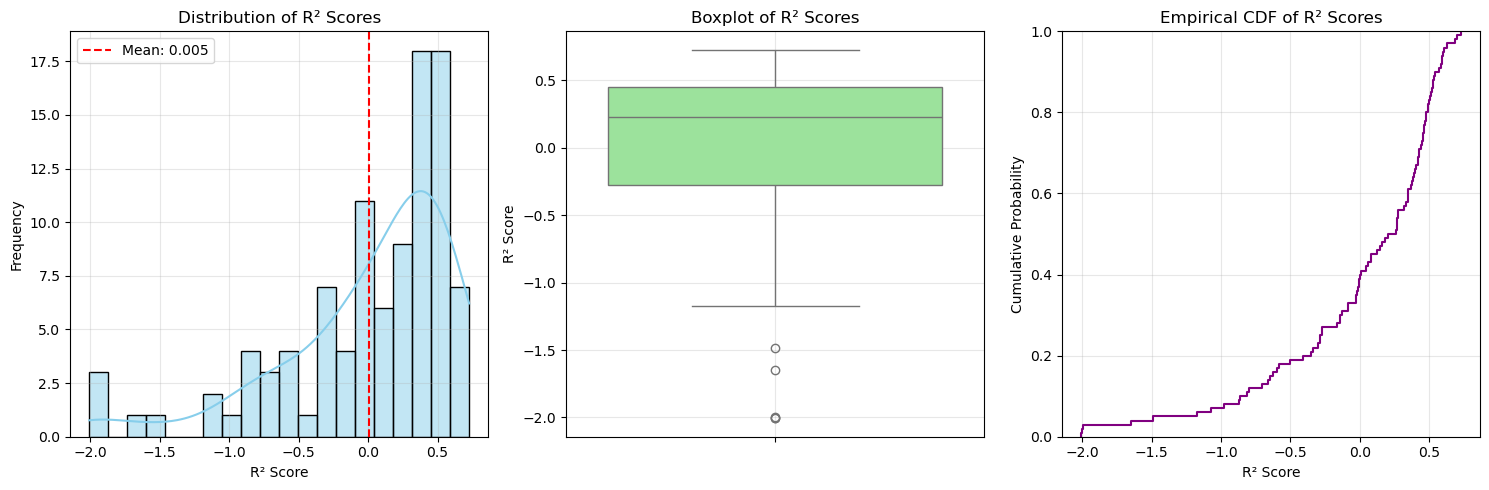


R² Score Statistics:
Mean: 0.0051
Median: 0.2306
Standard Deviation: 0.6175
Minimum: -2.0068
Maximum: 0.7280
5th Percentile: -1.1910
95th Percentile: 0.5980

Best performance (R² = 0.7280) at random_state = 73
Worst performance (R² = -2.0068) at random_state = 41


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

# Load your data
df = pd.read_csv('TPA_DPU2023_normalized_Gel_Strength.csv')

# Configuration
N_TRIALS = 100  # Number of random states to test
TEST_SIZE = 0.3  # Validation set size

# MLP Regressor parameters (you can adjust these)
hidden_layer_sizes = (100,)  # Single hidden layer with 100 neurons
activation = 'relu'          # Activation function
solver = 'adam'              # Optimizer
max_iter = 1000              # Maximum number of iterations
early_stopping = True        # Use early stopping
random_state = None          # Will be set in the loop

# Store results
r2_scores = []

for state in range(N_TRIALS):
    # Split data
    X = df.iloc[:, 0:3].values  # Features (columns 1-3)
    y = df.iloc[:, 3].values     # Target (column 4)
    
    X_train, X_valid, y_train, y_valid = train_test_split(
        X, y, test_size=TEST_SIZE, random_state=state)
    
    # Standardize
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_valid = scaler.transform(X_valid)
    
    # Train and evaluate MLP
    model = MLPRegressor(
        hidden_layer_sizes=hidden_layer_sizes,
        activation=activation,
        solver=solver,
        max_iter=max_iter,
        early_stopping=early_stopping,
        random_state=state
    )
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    r2 = r2_score(y_valid, y_pred)
    
    r2_scores.append(r2)

# Convert to numpy array
r2_scores = np.array(r2_scores)

# Create figure with multiple subplots
plt.figure(figsize=(15, 5))

# 1. Histogram of R² scores
plt.subplot(1, 3, 1)
sns.histplot(r2_scores, bins=20, kde=True, color='skyblue')
plt.axvline(np.mean(r2_scores), color='red', linestyle='--', 
            label=f'Mean: {np.mean(r2_scores):.3f}')
plt.xlabel('R² Score')
plt.ylabel('Frequency')
plt.title('Distribution of R² Scores')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Boxplot of R² scores
plt.subplot(1, 3, 2)
sns.boxplot(y=r2_scores, color='lightgreen')
plt.ylabel('R² Score')
plt.title('Boxplot of R² Scores')
plt.grid(True, alpha=0.3)

# 3. ECDF Plot
plt.subplot(1, 3, 3)
sns.ecdfplot(r2_scores, color='purple')
plt.xlabel('R² Score')
plt.ylabel('Cumulative Probability')
plt.title('Empirical CDF of R² Scores')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistical summary
print("\nR² Score Statistics:")
print(f"Mean: {np.mean(r2_scores):.4f}")
print(f"Median: {np.median(r2_scores):.4f}")
print(f"Standard Deviation: {np.std(r2_scores):.4f}")
print(f"Minimum: {np.min(r2_scores):.4f}")
print(f"Maximum: {np.max(r2_scores):.4f}")
print(f"5th Percentile: {np.percentile(r2_scores, 5):.4f}")
print(f"95th Percentile: {np.percentile(r2_scores, 95):.4f}")

# Best/worst cases
best_idx = np.argmax(r2_scores)
worst_idx = np.argmin(r2_scores)
print(f"\nBest performance (R² = {r2_scores[best_idx]:.4f}) at random_state = {best_idx}")
print(f"Worst performance (R² = {r2_scores[worst_idx]:.4f}) at random_state = {worst_idx}")

# XGB Regressor

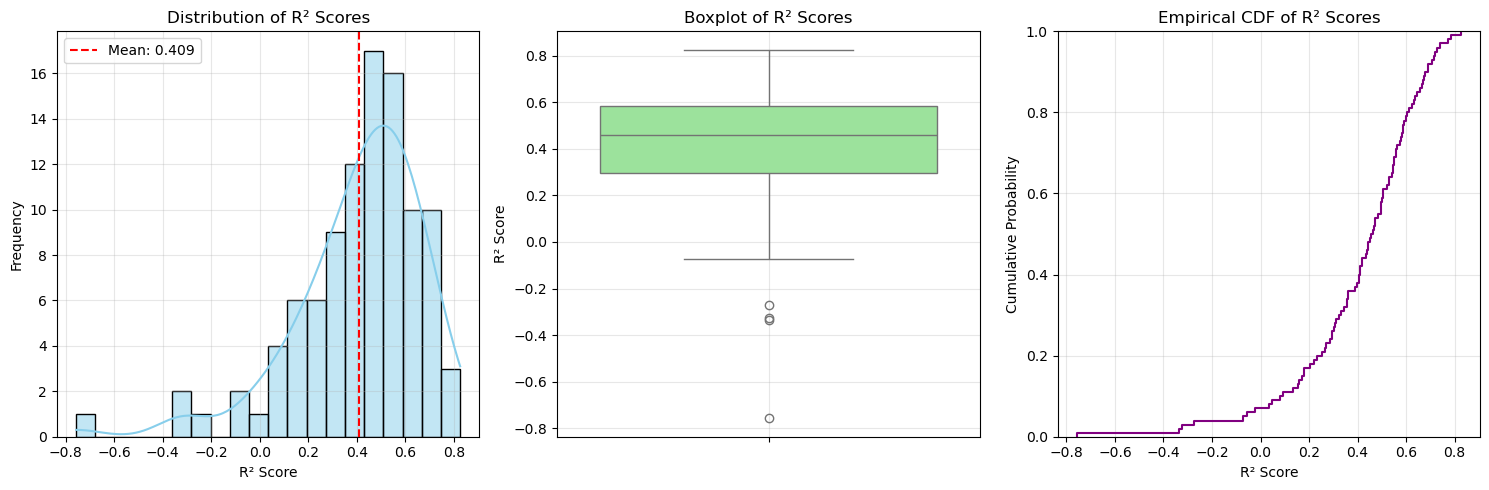


R² Score Statistics:
Mean: 0.4091
Median: 0.4583
Standard Deviation: 0.2623
Minimum: -0.7569
Maximum: 0.8253
5th Percentile: -0.0555
95th Percentile: 0.7202

Feature Importance Stability (Mean ± Std Dev):
MMF: 0.0516 ± 0.0239
TG: 0.8697 ± 0.0480
CLG: 0.0787 ± 0.0369

Best performance (R² = 0.8253) at random_state = 58
Worst performance (R² = -0.7569) at random_state = 80


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

# Load your data
df = pd.read_csv('TPA_DPU2023_normalized_Gel_Strength.csv')

# Configuration
N_TRIALS = 100  # Number of random states to test
TEST_SIZE = 0.3  # Validation set size

# Store results
r2_scores = []
feature_importances = []

for state in range(N_TRIALS):
    # Split data
    X = df.iloc[:, 0:3].values  # Features (columns 1-3)
    y = df.iloc[:, 3].values     # Target (column 4)
    
    X_train, X_valid, y_train, y_valid = train_test_split(
        X, y, test_size=TEST_SIZE, random_state=state)
    
    # Standardize
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_valid = scaler.transform(X_valid)
    
    # Train and evaluate
    model = XGBRegressor(random_state=state)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    r2 = r2_score(y_valid, y_pred)
    
    r2_scores.append(r2)
    feature_importances.append(model.feature_importances_)

# Convert to numpy arrays
r2_scores = np.array(r2_scores)
feature_importances = np.array(feature_importances)

# Create figure with multiple subplots
plt.figure(figsize=(15, 5))

# 1. Histogram of R² scores
plt.subplot(1, 3, 1)
sns.histplot(r2_scores, bins=20, kde=True, color='skyblue')
plt.axvline(np.mean(r2_scores), color='red', linestyle='--', 
            label=f'Mean: {np.mean(r2_scores):.3f}')
plt.xlabel('R² Score')
plt.ylabel('Frequency')
plt.title('Distribution of R² Scores')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Boxplot of R² scores
plt.subplot(1, 3, 2)
sns.boxplot(y=r2_scores, color='lightgreen')
plt.ylabel('R² Score')
plt.title('Boxplot of R² Scores')
plt.grid(True, alpha=0.3)

# 3. ECDF Plot
plt.subplot(1, 3, 3)
sns.ecdfplot(r2_scores, color='purple')
plt.xlabel('R² Score')
plt.ylabel('Cumulative Probability')
plt.title('Empirical CDF of R² Scores')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistical summary
print("\nR² Score Statistics:")
print(f"Mean: {np.mean(r2_scores):.4f}")
print(f"Median: {np.median(r2_scores):.4f}")
print(f"Standard Deviation: {np.std(r2_scores):.4f}")
print(f"Minimum: {np.min(r2_scores):.4f}")
print(f"Maximum: {np.max(r2_scores):.4f}")
print(f"5th Percentile: {np.percentile(r2_scores, 5):.4f}")
print(f"95th Percentile: {np.percentile(r2_scores, 95):.4f}")

# Feature importance analysis
print("\nFeature Importance Stability (Mean ± Std Dev):")
feature_names = ['MMF', 'TG', 'CLG']  # Adjust if your features have different names
for i, col in enumerate(feature_names):
    print(f"{col}: {np.mean(feature_importances[:, i]):.4f} ± {np.std(feature_importances[:, i]):.4f}")

# Best/worst cases
best_idx = np.argmax(r2_scores)
worst_idx = np.argmin(r2_scores)
print(f"\nBest performance (R² = {r2_scores[best_idx]:.4f}) at random_state = {best_idx}")
print(f"Worst performance (R² = {r2_scores[worst_idx]:.4f}) at random_state = {worst_idx}")

# Synthetic Data for RF

In [26]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KernelDensity
from scipy.stats import norm
import time
from functools import wraps

def time_execution(func):
    """Decorator to measure function execution time"""
    @wraps(func)
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        execution_time = end_time - start_time
        print(f"{func.__name__} executed in {execution_time:.2f} seconds ({execution_time/60:.2f} minutes)")
        return result
    return wrapper

# Apply the decorator to your function
@time_execution

def generate_synthetic_data(original_file, output_file, n_samples=240, fit_value=0.003):
    """
    Generate synthetic data with fitness validation
    
    Args:
        original_file (str): Path to input CSV file
        output_file (str): Path to save output CSV
        n_samples (int): Number of samples to generate
        fit_value (float): Threshold for output validation
    """
    # Load and verify data
    df = pd.read_csv(original_file)
    
    # Define columns
    input_cols = ['MMF', 'TG', 'CLG']
    output_col = 'Gel Strenght(N*m)'
    
    # Verify columns exist
    for col in input_cols + [output_col]:
        if col not in df.columns:
            raise ValueError(f"Column '{col}' not found in input data")

    # 1. Fit models
    model = RandomForestRegressor(n_estimators=100, random_state=58)
    model.fit(df[input_cols], df[output_col])
    
    # Fit KDEs for each input
    kdes = {col: KernelDensity(kernel='gaussian').fit(df[[col]]) 
            for col in input_cols}
    
    # Fit KDE for output 
    output_kde = KernelDensity(kernel='gaussian').fit(df[[output_col]])

    # 2. Generate synthetic samples
    valid_samples = pd.DataFrame()
    
    while len(valid_samples) < n_samples:
        # Generate needed samples
        needed = n_samples - len(valid_samples)
        synthetic = pd.DataFrame()
        
        # Generate input features
        for col in input_cols:
            samples = kdes[col].sample(n_samples=needed)
            synthetic[col] = np.clip(samples.flatten(), 
                                   df[col].min(), 
                                   df[col].max())
        
        # Generate output values 
        synthetic_output = output_kde.sample(n_samples=needed).flatten()
        synthetic[output_col] = np.clip(synthetic_output,
                                      df[output_col].min(),
                                      df[output_col].max())
        
        # Calculate prediction errors 
        predicted_output = model.predict(synthetic[input_cols])
        errors = np.abs(predicted_output - synthetic[output_col])
        threshold = fit_value * df[output_col].std()
        
        # Filter valid samples
        valid_batch = synthetic[errors <= threshold]
        valid_samples = pd.concat([valid_samples, valid_batch])
    
    # Trim to exact number of samples
    valid_samples = valid_samples.head(n_samples)
    
    # 3. Enforce positivity and save
    for col in input_cols + [output_col]:
        valid_samples[col] = valid_samples[col].clip(lower=0.001)
    
    valid_samples.to_csv(output_file, index=False)
    print(f"Successfully generated {len(valid_samples)} validated samples")
    print(f"Saved to {output_file}")

# Usage example
generate_synthetic_data(
    original_file='TPA_DPU2023_normalized_Gel_Strength.csv',
    output_file='synthetic_TPA_DPU2023_normalized_Gel_Strength.csv',
    n_samples=240,
    fit_value=0.003
)

Successfully generated 240 validated samples
Saved to synthetic_TPA_DPU2023_normalized_Gel_Strength.csv
generate_synthetic_data executed in 122.27 seconds (2.04 minutes)


# Combine Data

In [1]:
import pandas as pd

def combine_selected_columns(original_file, synthetic_file, output_file):

    # 1. 读取数据
    original_df = pd.read_csv(original_file)
    synthetic_df = pd.read_csv(synthetic_file)
    
    # 3. 添加来源标识
    original_df ['data_type'] = 'real'
    synthetic_df['data_type'] = 'synthetic'
    
    # 4. 统一列名（确保能正确合并）
    synthetic_df.columns = original_df.columns
    
    # 5. 合并数据
    combined_df = pd.concat([original_df , synthetic_df], ignore_index=True)
    
    # 6. 保存结果
    combined_df.to_csv(output_file, index=False)
    
    # 打印结果摘要
    print(f"合并完成！\n"
          f"原始数据列名: {original_df.columns.tolist()}\n"
          f"合并后总行数: {len(combined_df)} (原始: {len(original_df)}, 合成: {len(synthetic_df)})")

# 使用示例
combine_selected_columns(
    original_file='TPA_DPU2023_normalized_Gel_Strength.csv',
    synthetic_file='synthetic_TPA_DPU2023_normalized_Gel_Strength.csv',
    output_file='synthetic_real_TPA_DPU2023_normalized_Gel_Strength.csv'
)

合并完成！
原始数据列名: ['MMF', 'TG', 'CLG', 'Gel Strenght(N*m)', 'data_type']
合并后总行数: 300 (原始: 60, 合成: 240)


# Model Performance for Combined Data

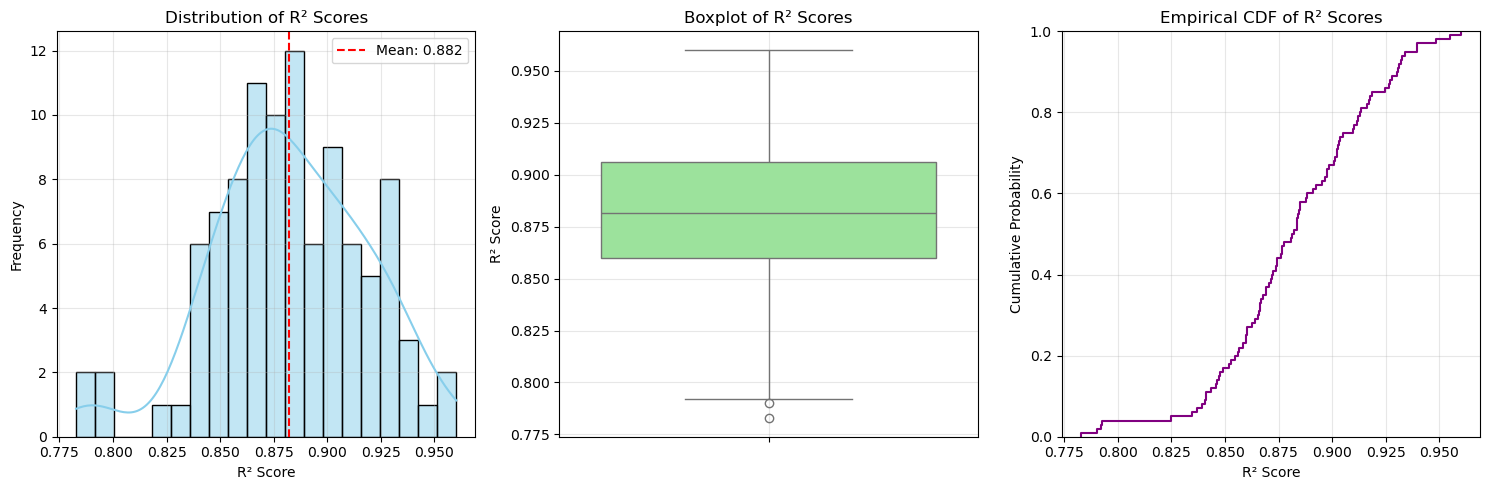


R² Score Statistics:
Mean: 0.8823
Median: 0.8816
Standard Deviation: 0.0356
Minimum: 0.7827
Maximum: 0.9601
5th Percentile: 0.8340
95th Percentile: 0.9345

Feature Importance Stability (Mean ± Std Dev):
MMF: 0.0605 ± 0.0051
TG: 0.8552 ± 0.0106
CLG: 0.0843 ± 0.0075


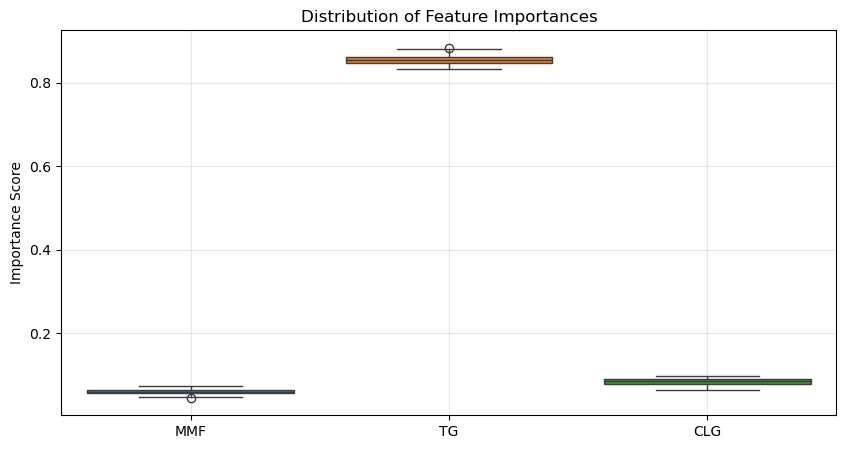


Best performance (R² = 0.9601) at random_state = 17
Worst performance (R² = 0.7827) at random_state = 4


In [28]:
# Load your data
df = pd.read_csv('synthetic_real_TPA_DPU2023_normalized_Gel_Strength.csv')

# Configuration
N_TRIALS = 100  # Number of random states to test
TEST_SIZE = 0.3  # Validation set size

# Store results
r2_scores = []
feature_importances = []

for state in range(N_TRIALS):
    # Split data
    X = df.iloc[:, 0:3].values  # Features (columns 1-3)
    y = df.iloc[:, 3].values     # Target (column 4)
    
    X_train, X_valid, y_train, y_valid = train_test_split(
        X, y, test_size=TEST_SIZE, random_state=state)
    
    # Standardize (optional for Random Forest, but can be done)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_valid = scaler.transform(X_valid)
    
    # Train and evaluate Random Forest
    model = RandomForestRegressor(random_state=state)  # Set random_state for reproducibility
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    r2 = r2_score(y_valid, y_pred)
    
    r2_scores.append(r2)
    feature_importances.append(model.feature_importances_)  # Store feature importances

# Convert to numpy arrays
r2_scores = np.array(r2_scores)
feature_importances = np.array(feature_importances)

# Create figure with multiple subplots
plt.figure(figsize=(15, 5))

# 1. Histogram of R² scores
plt.subplot(1, 3, 1)
sns.histplot(r2_scores, bins=20, kde=True, color='skyblue')
plt.axvline(np.mean(r2_scores), color='red', linestyle='--', 
            label=f'Mean: {np.mean(r2_scores):.3f}')
plt.xlabel('R² Score')
plt.ylabel('Frequency')
plt.title('Distribution of R² Scores')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Boxplot of R² scores
plt.subplot(1, 3, 2)
sns.boxplot(y=r2_scores, color='lightgreen')
plt.ylabel('R² Score')
plt.title('Boxplot of R² Scores')
plt.grid(True, alpha=0.3)

# 3. ECDF Plot
plt.subplot(1, 3, 3)
sns.ecdfplot(r2_scores, color='purple')
plt.xlabel('R² Score')
plt.ylabel('Cumulative Probability')
plt.title('Empirical CDF of R² Scores')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistical summary
print("\nR² Score Statistics:")
print(f"Mean: {np.mean(r2_scores):.4f}")
print(f"Median: {np.median(r2_scores):.4f}")
print(f"Standard Deviation: {np.std(r2_scores):.4f}")
print(f"Minimum: {np.min(r2_scores):.4f}")
print(f"Maximum: {np.max(r2_scores):.4f}")
print(f"5th Percentile: {np.percentile(r2_scores, 5):.4f}")
print(f"95th Percentile: {np.percentile(r2_scores, 95):.4f}")

# Feature importance analysis
print("\nFeature Importance Stability (Mean ± Std Dev):")
feature_names = ['MMF', 'TG', 'CLG']
for i, col in enumerate(feature_names):
    print(f"{col}: {np.mean(feature_importances[:, i]):.4f} ± {np.std(feature_importances[:, i]):.4f}")

# Plot feature importances
plt.figure(figsize=(10, 5))
sns.boxplot(data=pd.DataFrame(feature_importances, columns=feature_names))
plt.title('Distribution of Feature Importances')
plt.ylabel('Importance Score')
plt.grid(True, alpha=0.3)
plt.show()

# Best/worst cases
best_idx = np.argmax(r2_scores)
worst_idx = np.argmin(r2_scores)
print(f"\nBest performance (R² = {r2_scores[best_idx]:.4f}) at random_state = {best_idx}")
print(f"Worst performance (R² = {r2_scores[worst_idx]:.4f}) at random_state = {worst_idx}")

# Representativeness

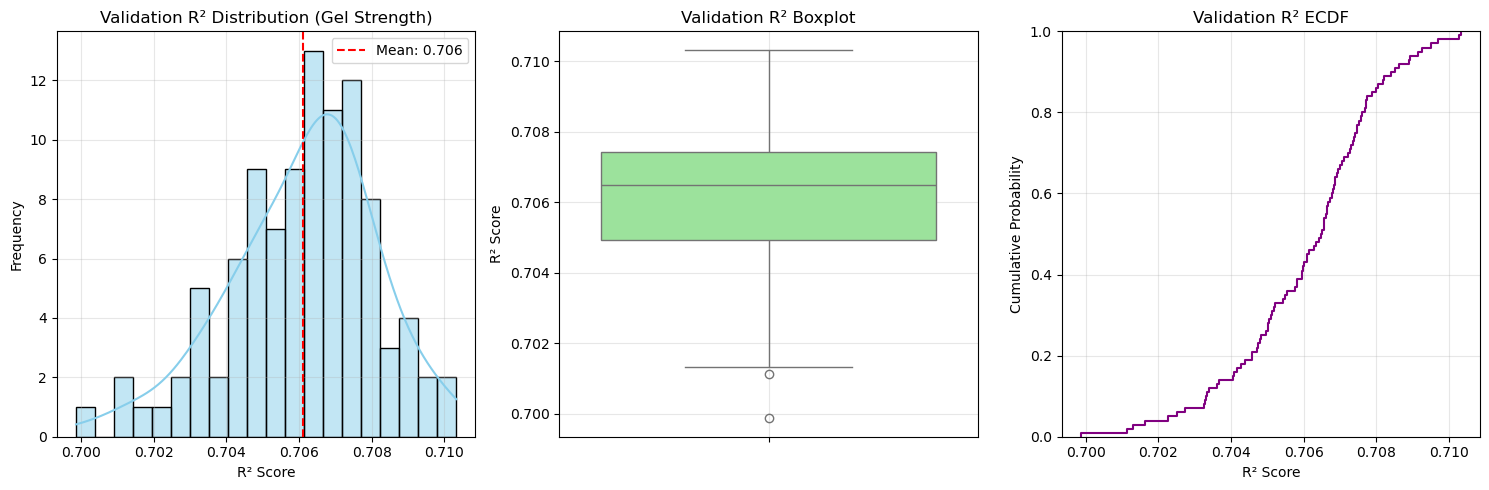


Validation R² Score Statistics (Gel Strength):
Mean: 0.7061
Median: 0.7065
Standard Deviation: 0.0020
Minimum: 0.6999
Maximum: 0.7103
5th Percentile: 0.7025
95th Percentile: 0.7091

Feature Importance Stability (Mean ± Std Dev):
MMF: 0.0553 ± 0.0010
TG: 0.8721 ± 0.0013
CLG: 0.0725 ± 0.0010


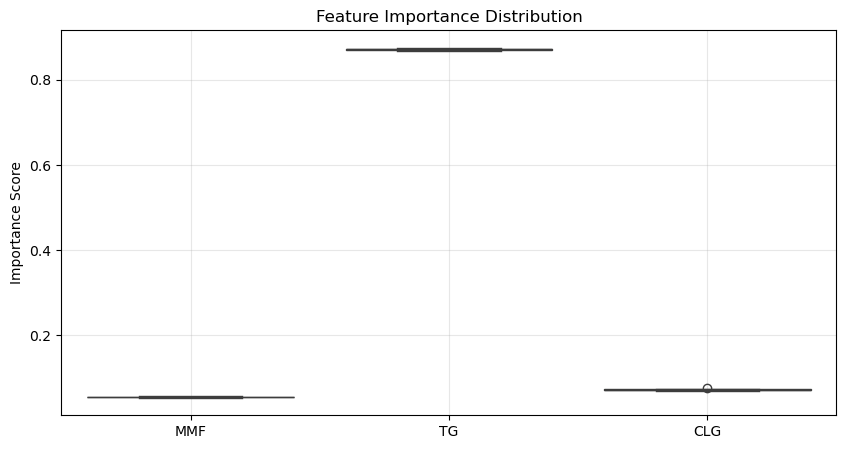


Best validation performance (R² = 0.7103) at random_state = 40
Worst validation performance (R² = 0.6999) at random_state = 79

Final model trained with best random_state on full Dataset One


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# Load your datasets
df_train = pd.read_csv('synthetic_TPA_DPU2023_normalized_Gel_Strength.csv')  # Training dataset
df_val = pd.read_csv('TPA_DPU2023_normalized_Gel_Strength.csv')   # Validation dataset

# Configuration
N_TRIALS = 100  # Number of random states to test

# Store results
r2_scores = []
feature_importances = []

for state in range(N_TRIALS):
    # Prepare training data (from dataset one)
    X_train = df_train.iloc[:, 0:3].values  # Features (columns 1-3)
    y_train = df_train.iloc[:, 3].values    # Target (column 4)
    
    # Prepare validation data (from dataset two - no splitting needed)
    X_val = df_val.iloc[:, 0:3].values
    y_val = df_val.iloc[:, 3].values
    
    # Standardize (using training data statistics only)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    
    # Train and evaluate Random Forest
    model = RandomForestRegressor(random_state=state)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    r2 = r2_score(y_val, y_pred)
    
    r2_scores.append(r2)
    feature_importances.append(model.feature_importances_)

# Convert to numpy arrays
r2_scores = np.array(r2_scores)
feature_importances = np.array(feature_importances)

# Create figure with multiple subplots
plt.figure(figsize=(15, 5))

# 1. Histogram of R² scores
plt.subplot(1, 3, 1)
sns.histplot(r2_scores, bins=20, kde=True, color='skyblue')
plt.axvline(np.mean(r2_scores), color='red', linestyle='--', 
            label=f'Mean: {np.mean(r2_scores):.3f}')
plt.xlabel('R² Score')
plt.ylabel('Frequency')
plt.title('Validation R² Distribution (Gel Strength)')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Boxplot of R² scores
plt.subplot(1, 3, 2)
sns.boxplot(y=r2_scores, color='lightgreen')
plt.ylabel('R² Score')
plt.title('Validation R² Boxplot')
plt.grid(True, alpha=0.3)

# 3. ECDF Plot
plt.subplot(1, 3, 3)
sns.ecdfplot(r2_scores, color='purple')
plt.xlabel('R² Score')
plt.ylabel('Cumulative Probability')
plt.title('Validation R² ECDF')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistical summary
print("\nValidation R² Score Statistics (Gel Strength):")
print(f"Mean: {np.mean(r2_scores):.4f}")
print(f"Median: {np.median(r2_scores):.4f}")
print(f"Standard Deviation: {np.std(r2_scores):.4f}")
print(f"Minimum: {np.min(r2_scores):.4f}")
print(f"Maximum: {np.max(r2_scores):.4f}")
print(f"5th Percentile: {np.percentile(r2_scores, 5):.4f}")
print(f"95th Percentile: {np.percentile(r2_scores, 95):.4f}")

# Feature importance analysis
print("\nFeature Importance Stability (Mean ± Std Dev):")
feature_names = ['MMF', 'TG', 'CLG']  # Update with your actual feature names
for i, col in enumerate(feature_names):
    print(f"{col}: {np.mean(feature_importances[:, i]):.4f} ± {np.std(feature_importances[:, i]):.4f}")

# Plot feature importances
plt.figure(figsize=(10, 5))
sns.boxplot(data=pd.DataFrame(feature_importances, columns=feature_names))
plt.title('Feature Importance Distribution')
plt.ylabel('Importance Score')
plt.grid(True, alpha=0.3)
plt.show()

# Best/worst cases
best_idx = np.argmax(r2_scores)
worst_idx = np.argmin(r2_scores)
print(f"\nBest validation performance (R² = {r2_scores[best_idx]:.4f}) at random_state = {best_idx}")
print(f"Worst validation performance (R² = {r2_scores[worst_idx]:.4f}) at random_state = {worst_idx}")

# Optional: Train final model with best random state
final_model = RandomForestRegressor(random_state=best_idx)
final_model.fit(scaler.fit_transform(df_train.iloc[:, 0:3].values), df_train.iloc[:, 3].values)
print("\nFinal model trained with best random_state on full Dataset One")